In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)

Welcome to JupyROOT 6.12/06


In [2]:
#outfile = r.TFile("./FourierWiggle.root","RECREATE")
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()
t = f.Get("clusterTree").Get("clusters")

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
#incrementtime = 5*1000/1.25
incrementtime = .55*1000/1.25/2
cutlist = []
timelist = []
namelist = []
time1list = []
time2list = []
for i in range(0,48):
#    time1 = 5*1000/1.25
#    time2 = 405*1000/1.25
    time1 = 20*1000/1.25
    time2 = (392.85+20)*1000/1.25
    time1 = time1+i*incrementtime
    time2 = time2+i*incrementtime
    time1list.append(time1/1000*1.25)
    time2list.append(time2/1000*1.25)
    ding = "caloNum == 7 && energy > 1300 && energy < 3000 && time>" + str(time1) + " && time < " +str(time2)
#    if i == 0 or i == 1 or i == 2 or i ==3  or i == 5 or i == 9:
    cutlist.append(ding)
    timelist.append("time > "+str(time1/1000*1.25)+" && time < "+str(time2/1000*1.25))
    namelist.append("time"+str(i))
ncuts = len(cutlist)
print(ncuts)
print(timelist)
print(namelist)

48
['time > 20.0 && time < 412.84999999999997', 'time > 20.275 && time < 413.125', 'time > 20.55 && time < 413.40000000000003', 'time > 20.825 && time < 413.675', 'time > 21.099999999999998 && time < 413.95000000000005', 'time > 21.375 && time < 414.225', 'time > 21.65 && time < 414.5', 'time > 21.924999999999997 && time < 414.775', 'time > 22.200000000000003 && time < 415.05', 'time > 22.475 && time < 415.325', 'time > 22.75 && time < 415.6', 'time > 23.025000000000002 && time < 415.875', 'time > 23.3 && time < 416.15000000000003', 'time > 23.575 && time < 416.42499999999995', 'time > 23.849999999999998 && time < 416.70000000000005', 'time > 24.125 && time < 416.97499999999997', 'time > 24.4 && time < 417.25', 'time > 24.674999999999997 && time < 417.525', 'time > 24.950000000000003 && time < 417.8', 'time > 25.225 && time < 418.075', 'time > 25.5 && time < 418.35', 'time > 25.775000000000002 && time < 418.625', 'time > 26.05 && time < 418.9', 'time > 26.325 && time < 419.174999999999

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Appe

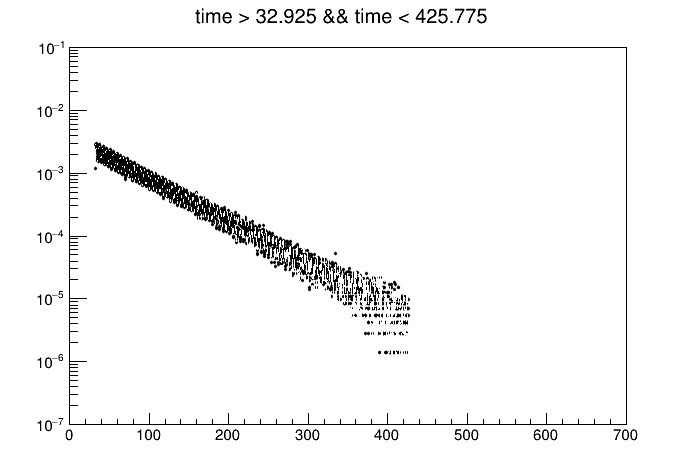

In [4]:
hlist = []
for i in range(0,ncuts):
    c = r.TCanvas()
    c.SetLogy()
    dong = timelist[i]
    h = r.TH1D("h",dong,4690,0,700)
#    maxbin = int(time2list[i])
#    nbins = 4690*maxbin/700
#    print(nbins,maxbin)
#    h = r.TH1D("h",dong,int(nbins),r.Double(0),r.Double(maxbin))
    h.SetMarkerColor(1)
    h.SetMarkerStyle(8)
    h.SetLineColor(1)
    h.SetMarkerSize(.25)
    t.Draw("time*1.25/1000>>h",cutlist[i],"goff")
    norm = h.GetEntries()
    h.Scale(1/norm)
    h.GetYaxis().SetRangeUser(.0000001,.1)
    h.Draw("E0 P0")
    hlist.append(h.DrawClone(namelist[i]))
    #h.SetTitle("")
    #outfile.cd()
    #h.Write("wiggleNoFit")
    c.Draw()

48
[<ROOT.TH1D object ("h") at 0x7fffefe3e300>, <ROOT.TH1D object ("h") at 0x7fffefda34a0>, <ROOT.TH1D object ("h") at 0x7fffefe9c070>, <ROOT.TH1D object ("h") at 0x7fffefe94a00>, <ROOT.TH1D object ("h") at 0x7fffefe94610>, <ROOT.TH1D object ("h") at 0x7fffeff5ad00>, <ROOT.TH1D object ("h") at 0x7fffefed29b0>, <ROOT.TH1D object ("h") at 0x7fffefed25c0>, <ROOT.TH1D object ("h") at 0x7fffeff6d660>, <ROOT.TH1D object ("h") at 0x7fffeff7b910>, <ROOT.TH1D object ("h") at 0x7fffefed42c0>, <ROOT.TH1D object ("h") at 0x7fffefed31e0>, <ROOT.TH1D object ("h") at 0x7fffefed38e0>, <ROOT.TH1D object ("h") at 0x7fffeff6ecd0>, <ROOT.TH1D object ("h") at 0x7fffeff6e8e0>, <ROOT.TH1D object ("h") at 0x7fffeff7bd00>, <ROOT.TH1D object ("h") at 0x7fffeff6f4b0>, <ROOT.TH1D object ("h") at 0x7fffeff6f8a0>, <ROOT.TH1D object ("h") at 0x7fffeff6fc90>, <ROOT.TH1D object ("h") at 0x7fffeff70080>, <ROOT.TH1D object ("h") at 0x7fffefd2a100>, <ROOT.TH1D object ("h") at 0x7fffeff71520>, <ROOT.TH1D object ("h") at 0

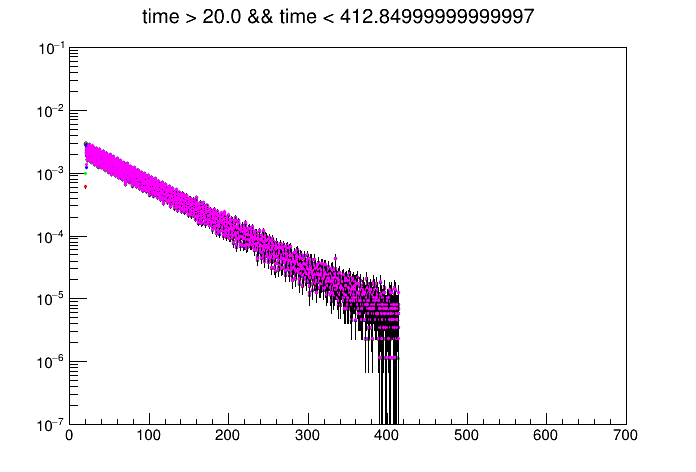

In [5]:
print(len(hlist))
print(hlist)
c2 = r.TCanvas()
c2.SetLogy()
hlist[0].Draw()
for i in range(1,5):
    hlist[i].SetMarkerColor(1+i)
    if i >= 4:
        hlist[i].SetMarkerColor(2+i)
    hlist[i].Draw("SAME")
c2.Draw()

In [6]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


 FCN=2585.81 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         510 TOTAL
                     EDM=9.26774e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            3.18532e-03   6.69960e-06  -1.07195e-09  -1.23510e-01
   2  #tau         6.39710e+01   7.72607e-02  -4.33125e-05  -2.48357e-05
   3  A            2.84131e-01   1.58256e-03  -4.90821e-06   7.69588e-04
   4  R           -2.50535e+01   6.37771e+01  -4.79726e-03  -1.73314e-07
   5  #phi        -1.04100e+00   1.02647e-02   1.02647e-02   3.82099e-03
 FCN=2585.81 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         510 TOTAL
                     EDM=5.09852e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            3.20174e-03   

Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: Graph (Potential me

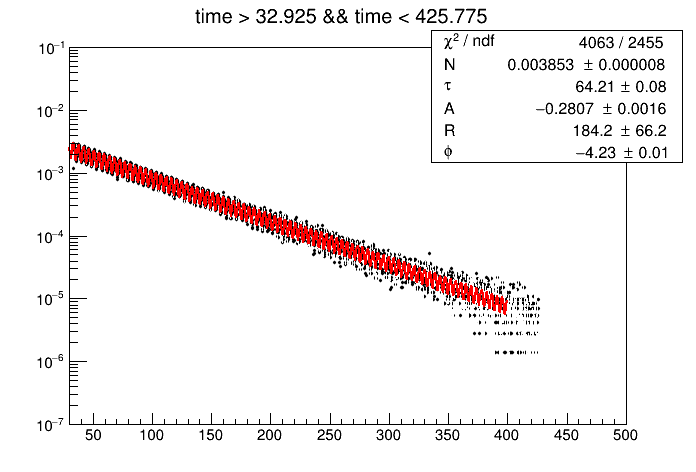

In [7]:
funclist = []
ratiolist = []
for i in range(0,len(namelist)):
    ding = namelist[i]+"fun"
    hi = hlist[i]
    func = r.TF1(ding, blinded_wiggle, 30,400,5)
    func.SetParNames('N','#tau','A','R','#phi')
    func.SetParameters(1500,64.4,0.4,0,0)
    func.SetLineColor(2)
    func.SetNpx(1000)
    r.gStyle.SetOptFit(111)
    
    hi.Draw()
    hi.GetXaxis().SetRangeUser(30,500)
    hi.Fit(ding,'REM')
    #The class calculates the  difference between the histogram and the fit function at each point 
    #    and divides it by the uncertainty.
    rp1 = r.TRatioPlot(hi)
    rp1.Draw()
    rp1.GetLowerRefYaxis().SetTitle("Residual")
    rp1.GetLowerRefYaxis().SetRangeUser(-3,3)
    tgraph = rp1.GetCalculationOutputGraph()
    dong = r.TGraphAsymmErrors(tgraph)
    dong.SetTitle(namelist[i]+"asym")
    ratiolist.append(dong)
    c.Draw()
    funclist.append(func)

[<ROOT.TGraphAsymmErrors object at 0x7ffff070f440>, <ROOT.TGraphAsymmErrors object at 0x7ffff0507bc0>, <ROOT.TGraphAsymmErrors object at 0x7ffff0800fb0>, <ROOT.TGraphAsymmErrors object at 0x7ffff03df8d0>, <ROOT.TGraphAsymmErrors object at 0x7ffff0895ee0>, <ROOT.TGraphAsymmErrors object at 0x7ffff06a8f90>, <ROOT.TGraphAsymmErrors object at 0x7ffff07e07c0>, <ROOT.TGraphAsymmErrors object at 0x7ffff07ee3e0>, <ROOT.TGraphAsymmErrors object at 0x7ffff06951b0>, <ROOT.TGraphAsymmErrors object at 0x7ffff090d8f0>, <ROOT.TGraphAsymmErrors object at 0x7ffff03f4910>, <ROOT.TGraphAsymmErrors object at 0x7ffff088bb30>, <ROOT.TGraphAsymmErrors object at 0x7ffff07fcfb0>, <ROOT.TGraphAsymmErrors object at 0x7ffff09b54d0>, <ROOT.TGraphAsymmErrors object at 0x7ffff08035b0>, <ROOT.TGraphAsymmErrors object at 0x7ffff0a03b40>, <ROOT.TGraphAsymmErrors object at 0x7ffff0a79dd0>, <ROOT.TGraphAsymmErrors object at 0x7ffff0b4e9f0>, <ROOT.TGraphAsymmErrors object at 0x7ffff092e690>, <ROOT.TGraphAsymmErrors object

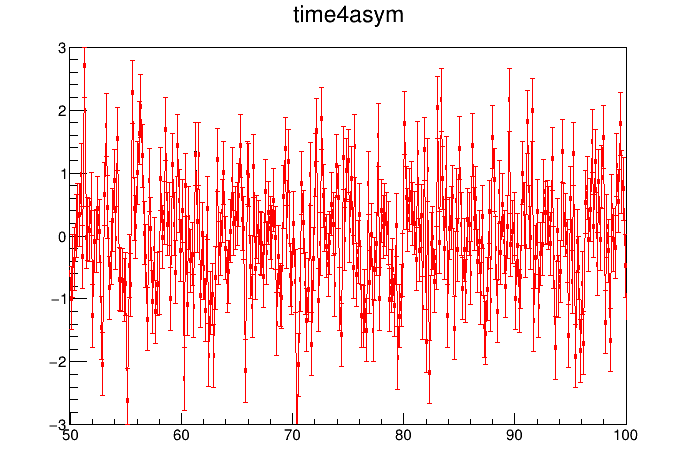

In [8]:
print(ratiolist)
c4 = r.TCanvas()
ratiolist[4].Draw()
ratiolist[4].GetXaxis().SetRangeUser(50,100)
ratiolist[4].GetYaxis().SetRangeUser(-3,3)
ratiolist[5].SetLineColor(2)
ratiolist[5].Draw("SAME")
c4.Draw()

[<ROOT.TF1 object ("time0fun") at 0x7ffff04939d0>, <ROOT.TF1 object ("time1fun") at 0x7ffff0800bb0>, <ROOT.TF1 object ("time2fun") at 0x7ffff07f1310>, <ROOT.TF1 object ("time3fun") at 0x7ffff03f3020>, <ROOT.TF1 object ("time4fun") at 0x7ffff0722560>, <ROOT.TF1 object ("time5fun") at 0x7ffff06b6300>, <ROOT.TF1 object ("time6fun") at 0x7ffff0895100>, <ROOT.TF1 object ("time7fun") at 0x7ffff0992960>, <ROOT.TF1 object ("time8fun") at 0x7ffff077db00>, <ROOT.TF1 object ("time9fun") at 0x7ffff09915d0>, <ROOT.TF1 object ("time10fun") at 0x7ffff08906a0>, <ROOT.TF1 object ("time11fun") at 0x7ffff073c330>, <ROOT.TF1 object ("time12fun") at 0x7ffff08a6360>, <ROOT.TF1 object ("time13fun") at 0x7ffff08b6460>, <ROOT.TF1 object ("time14fun") at 0x7ffff0944120>, <ROOT.TF1 object ("time15fun") at 0x7ffff0ab4090>, <ROOT.TF1 object ("time16fun") at 0x7ffff099af20>, <ROOT.TF1 object ("time17fun") at 0x7ffff092ea20>, <ROOT.TF1 object ("time18fun") at 0x7ffff0a6b560>, <ROOT.TF1 object ("time19fun") at 0x7fff

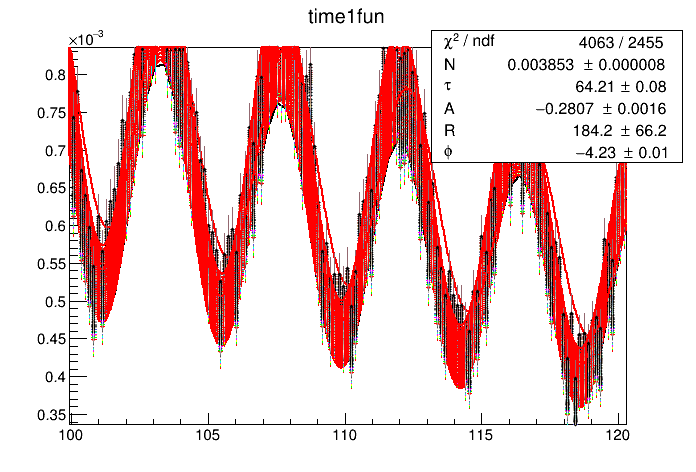

In [9]:
print(funclist)
c3 = r.TCanvas()
funclist[1].GetXaxis().SetRangeUser(100,120)
funclist[1].SetLineColor(1)
funclist[1].Draw()
for i in range(1,len(funclist)):
    hlist[i].SetLineColor(1+i)
    if i >= 3:
        hlist[i].SetLineColor(2+i)
    hlist[i].Draw("SAME")
c3.Draw()

4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286

Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Rep

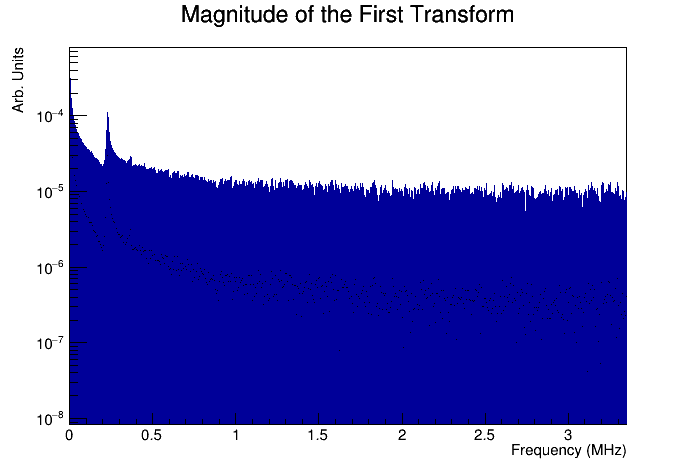

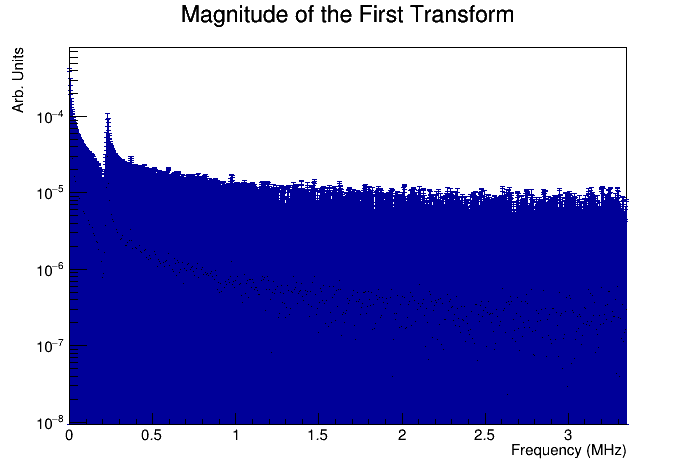

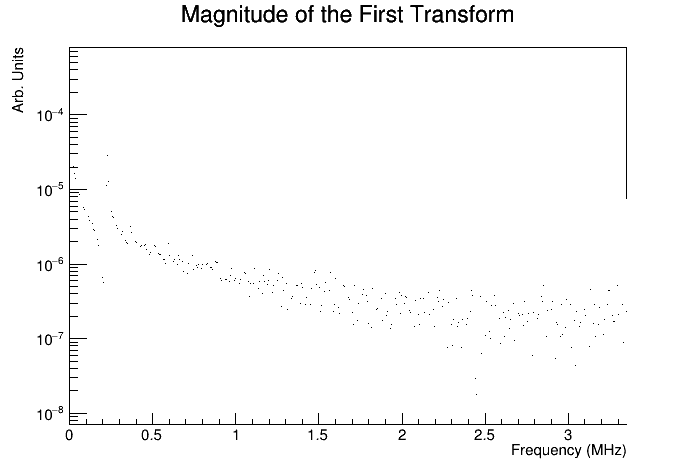

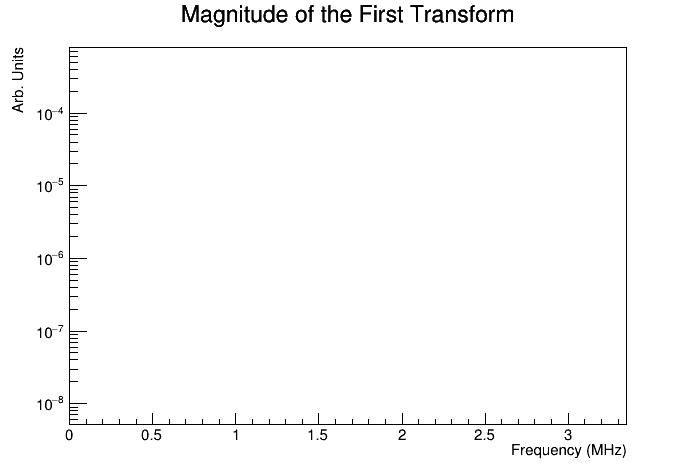

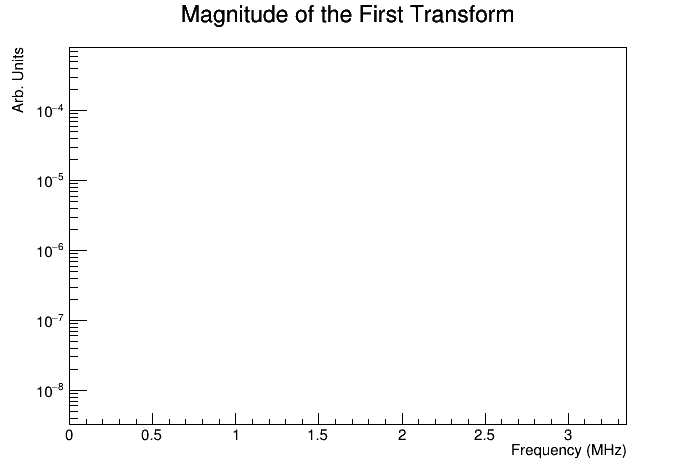

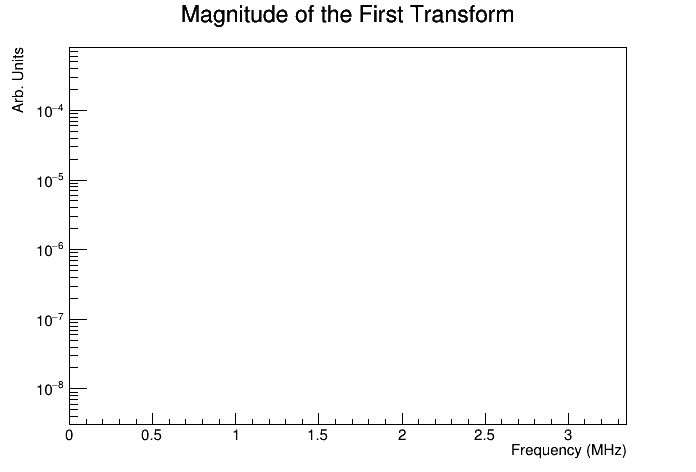

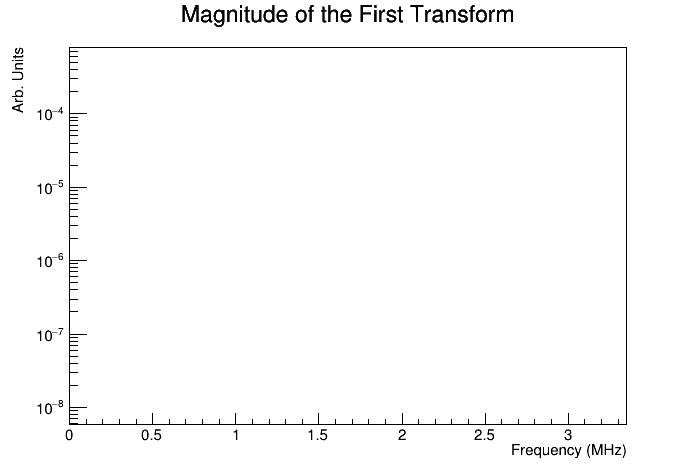

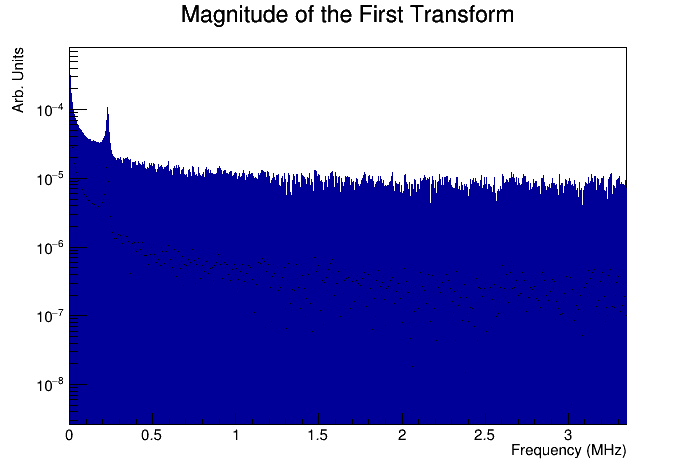

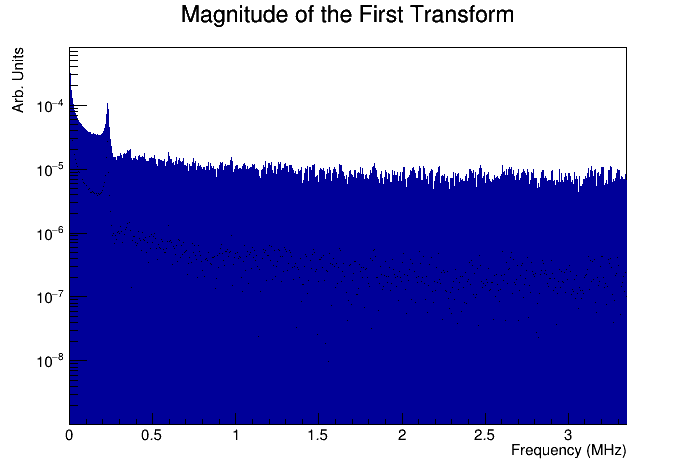

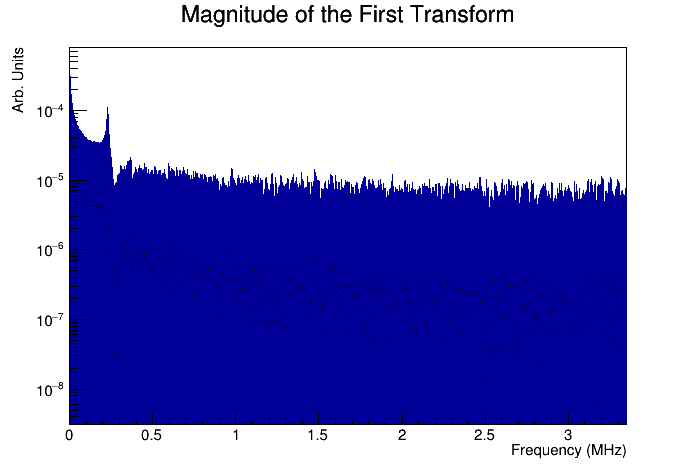

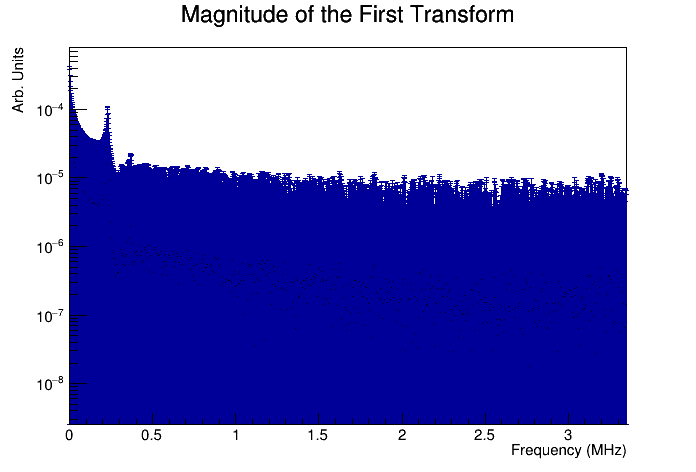

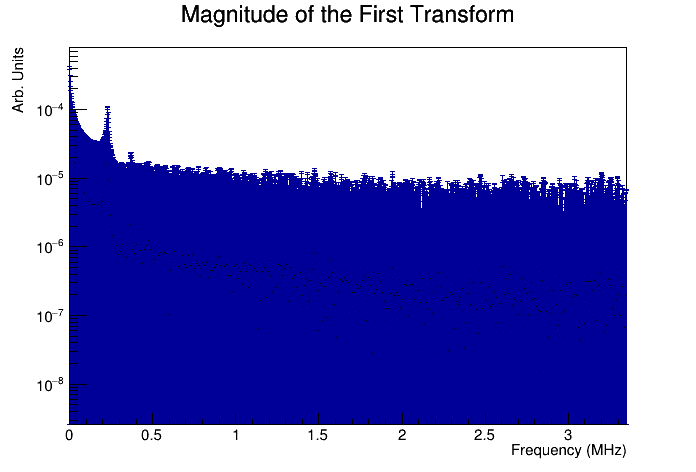

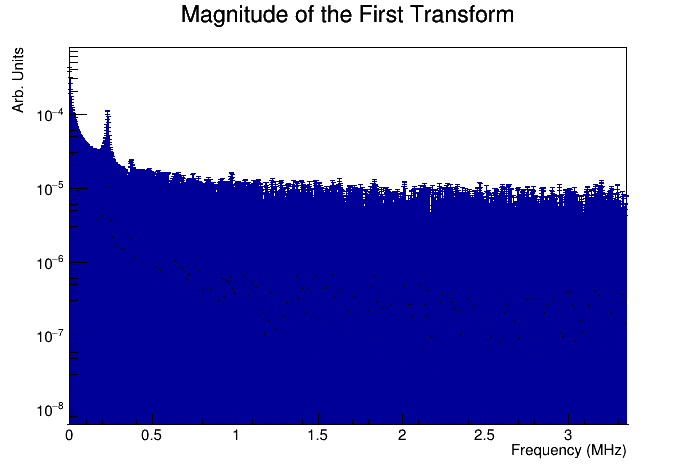

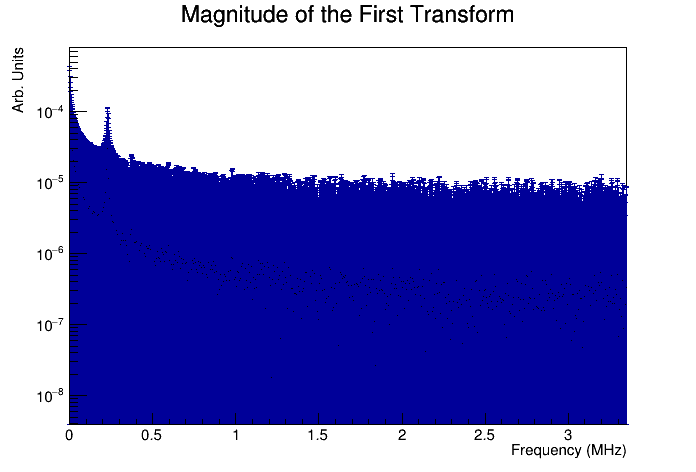

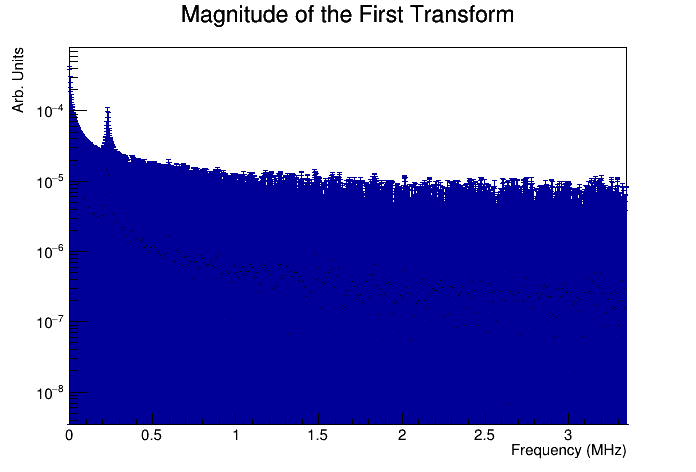

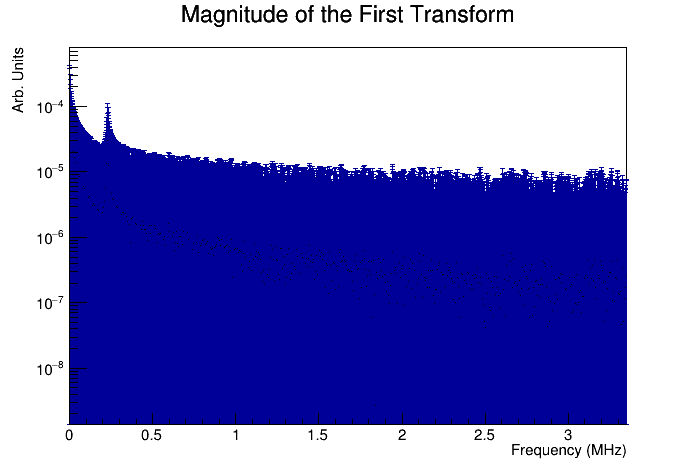

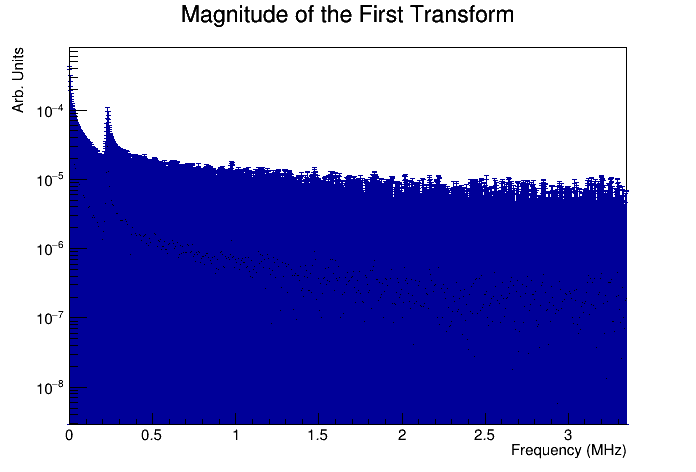

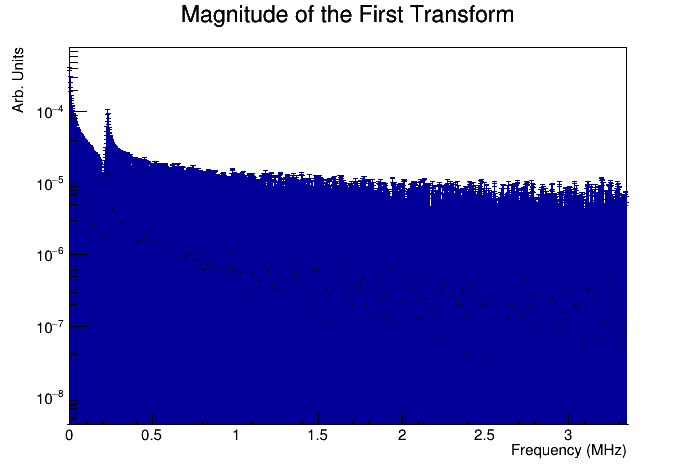

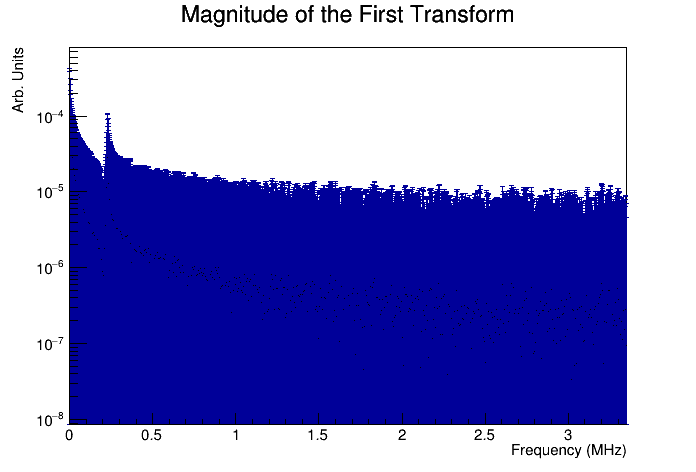

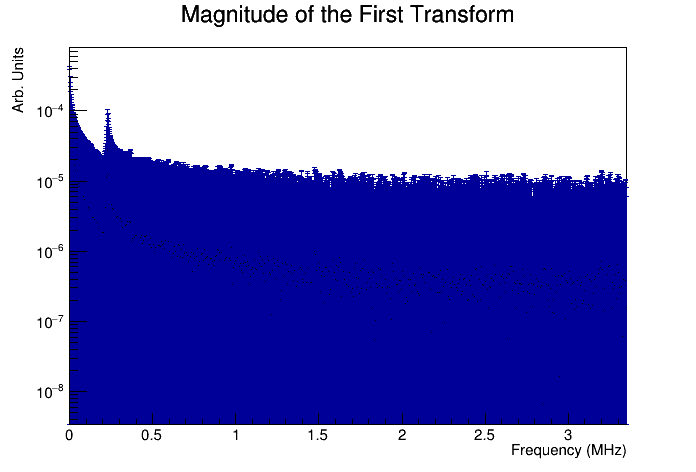

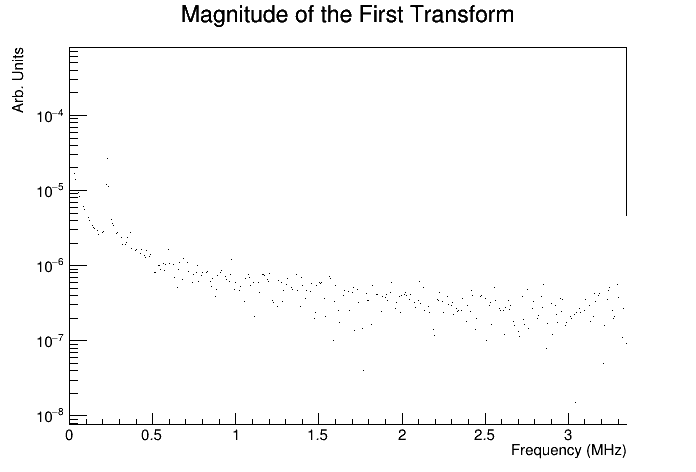

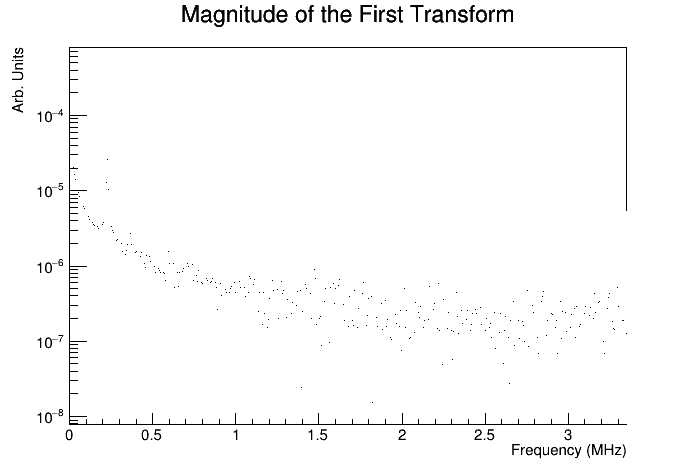

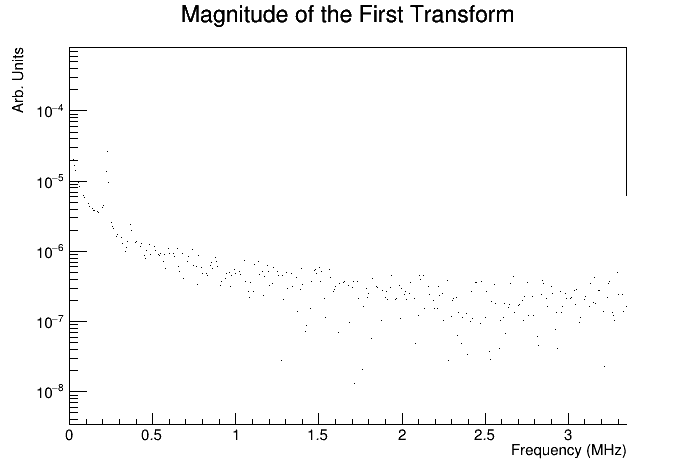

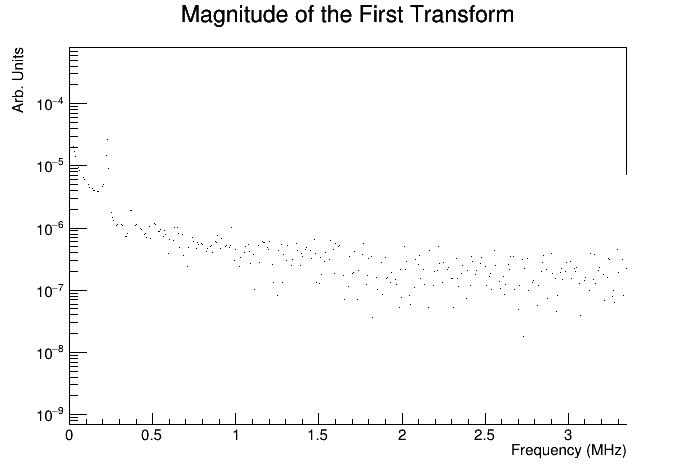

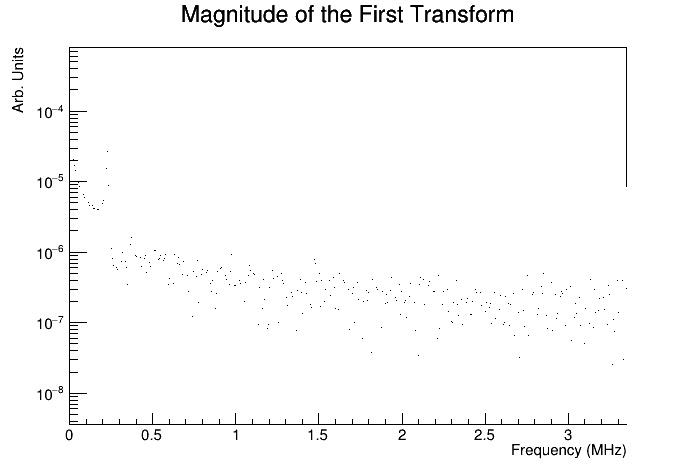

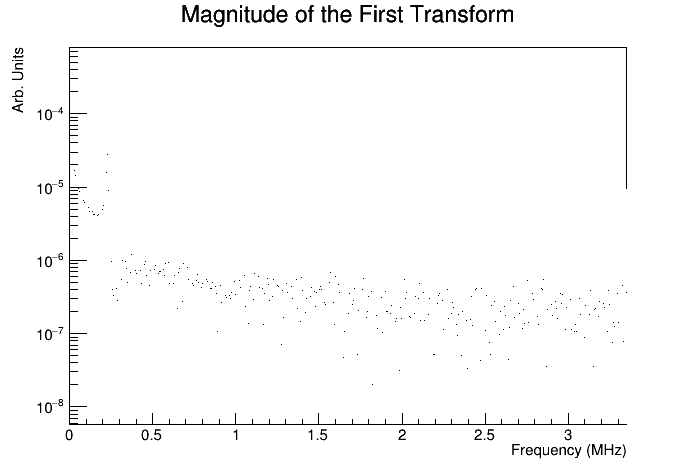

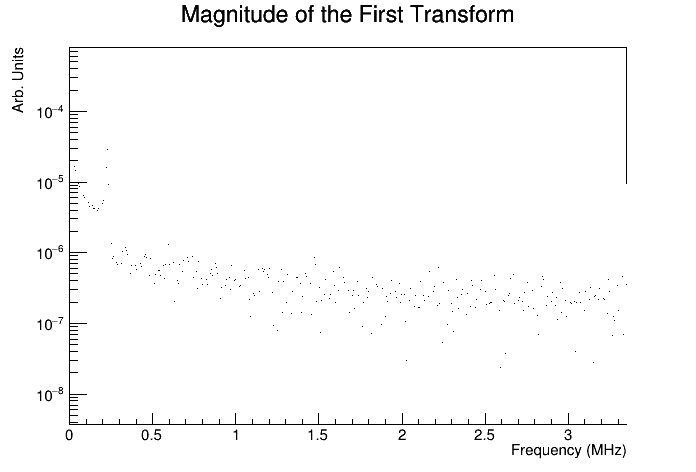

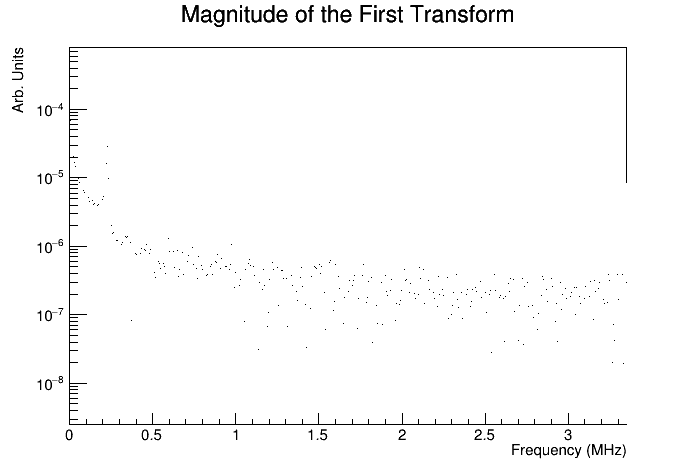

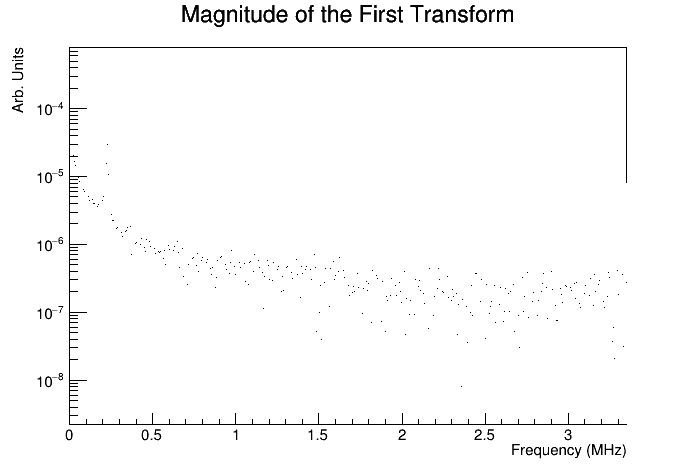

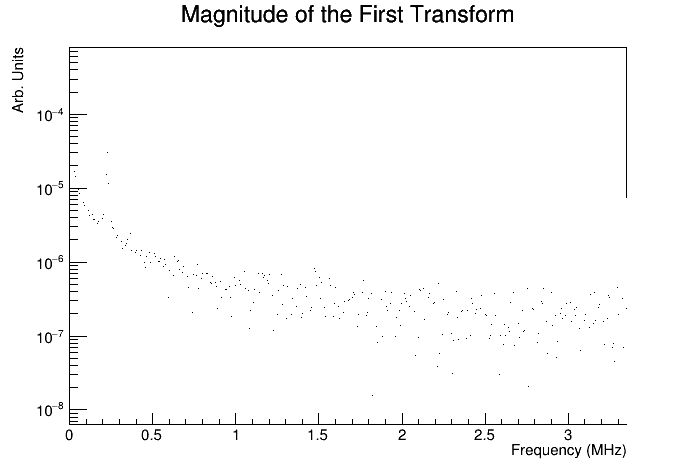

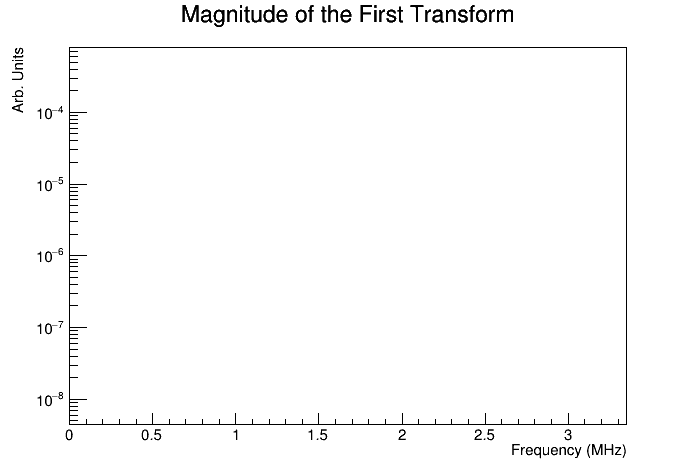

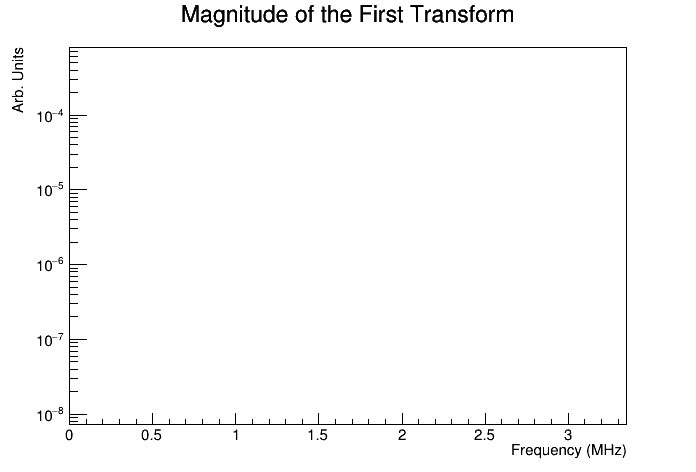

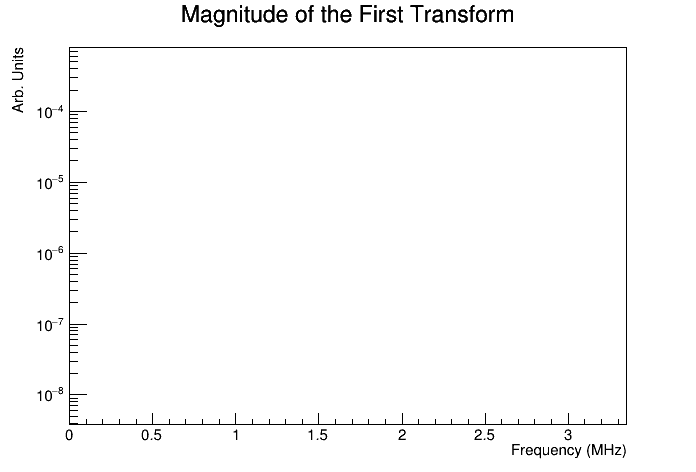

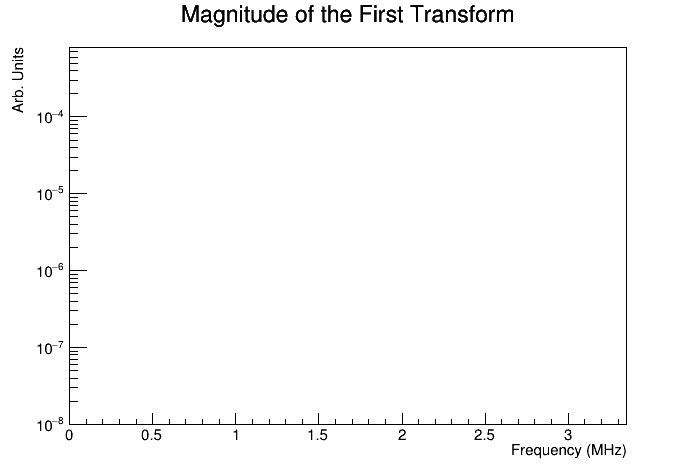

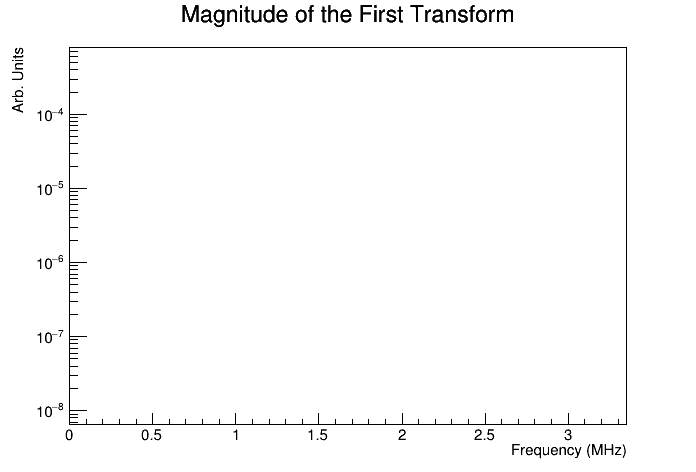

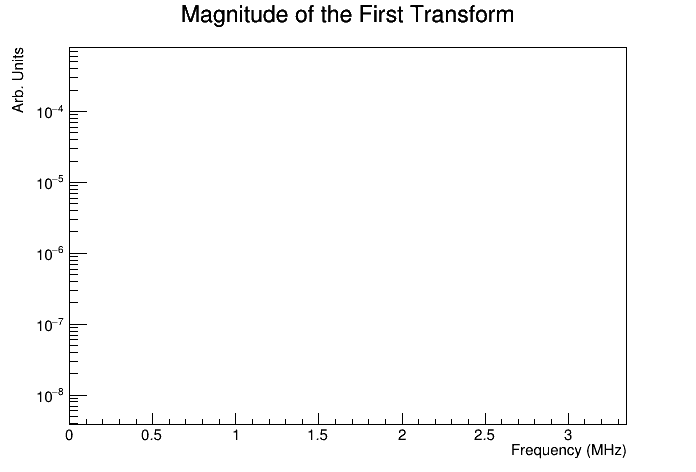

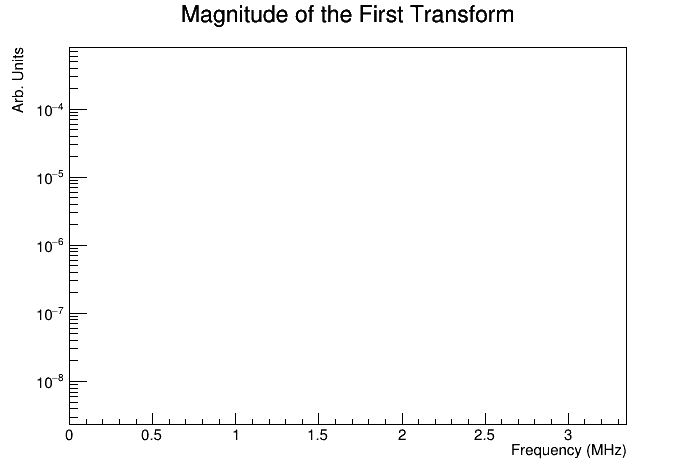

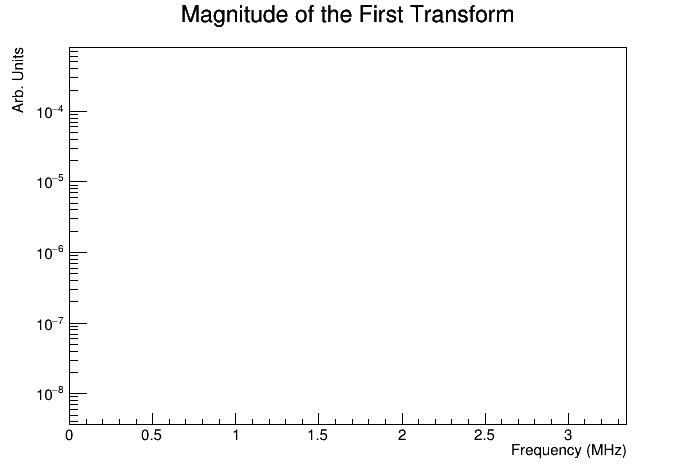

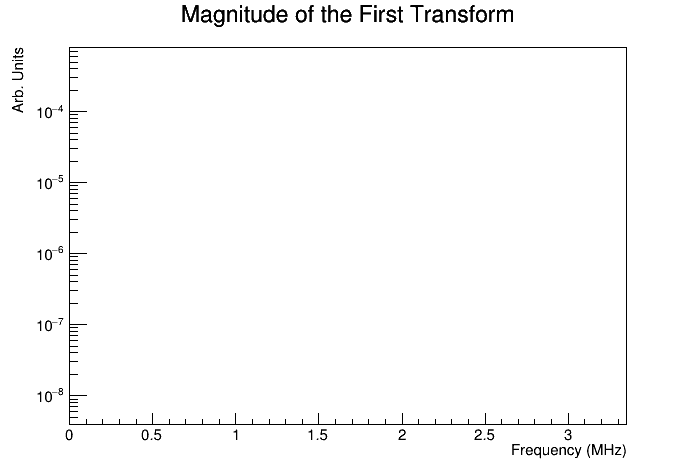

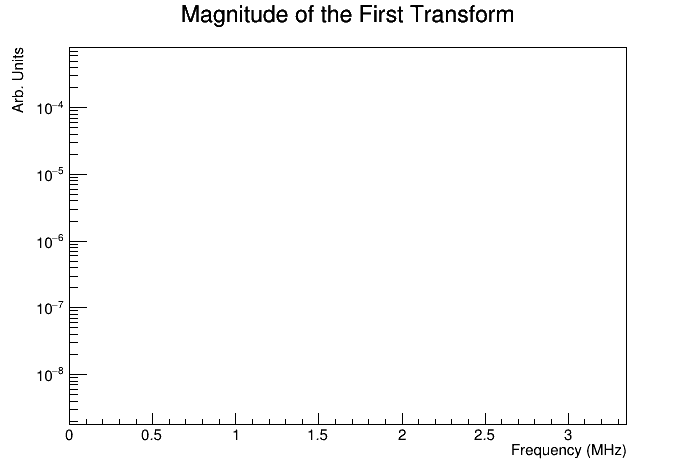

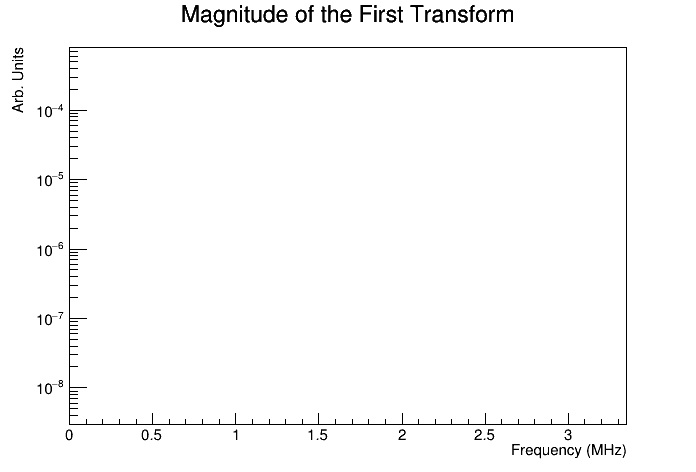

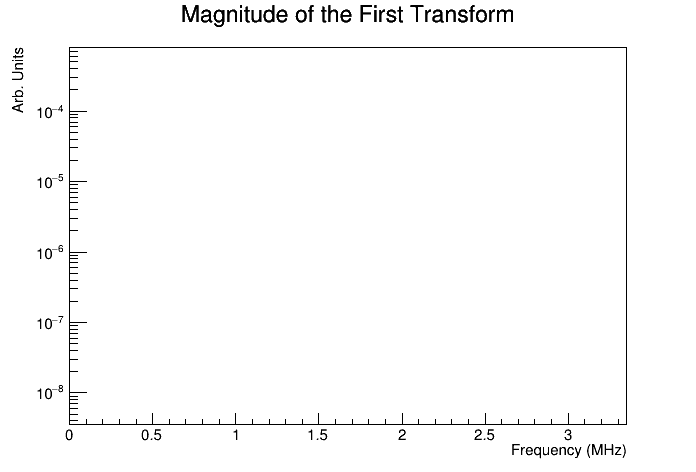

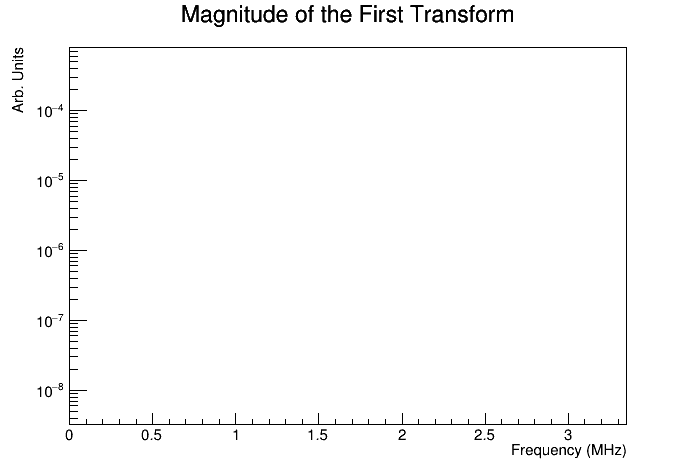

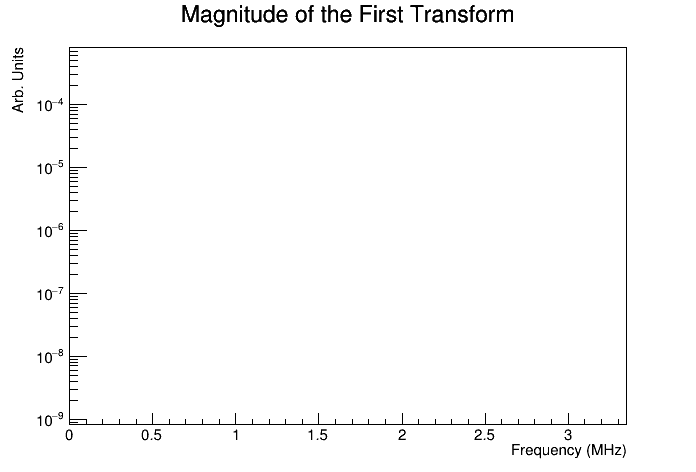

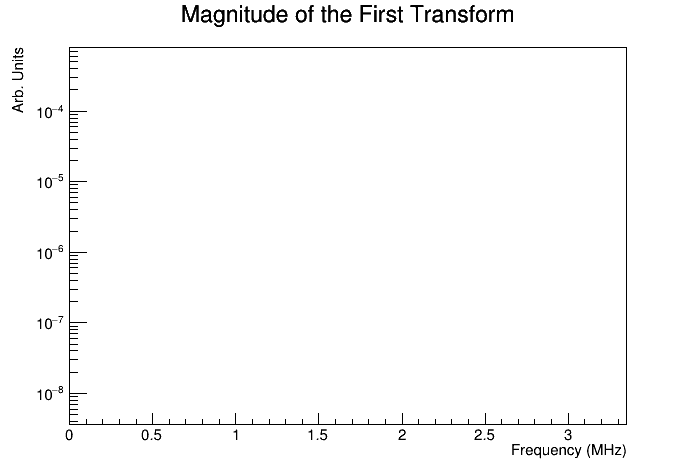

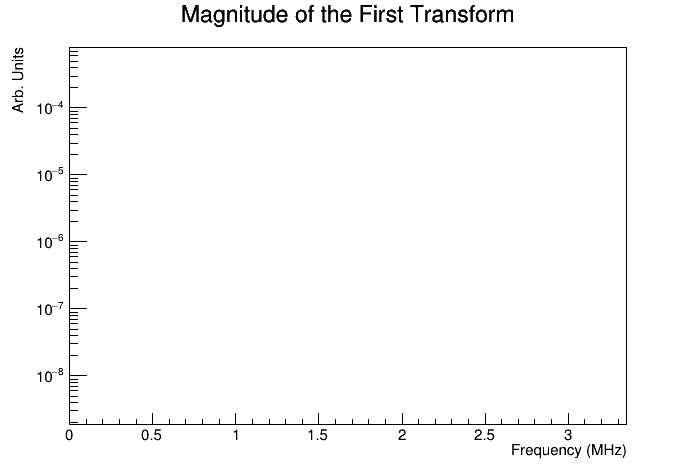

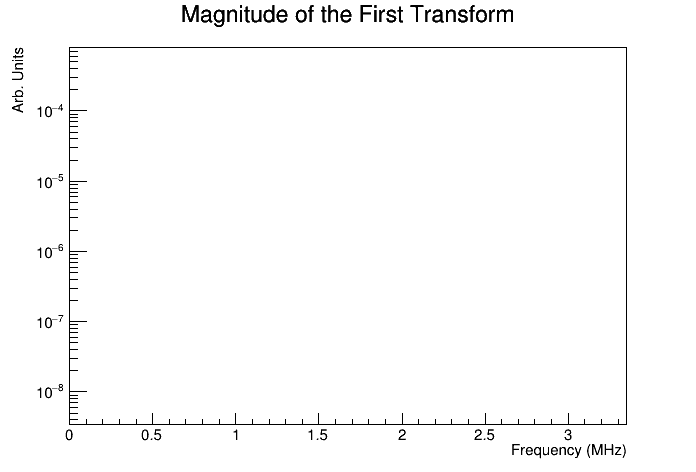

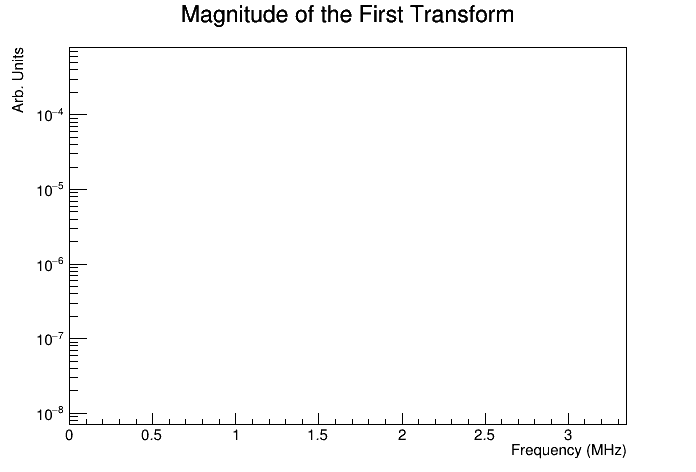

In [10]:
hxformlist = []
for i in range(0,len(namelist)):
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    h = hlist[i]
    hxform = h.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform")
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    #hxform.GetXaxis().SetRangeUser(0,limmax)
    c2 = r.TCanvas()
    c2.cd()
    c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("P0 L")
    c2.Draw()
    
    Npart = h.GetSize() - 2
    minBinCenter = h.GetXaxis().GetBinCenter(0)
    maxBinCenter = h.GetXaxis().GetBinCenter(Npart)
#    minBinCenter = 0
#    maxBinCenter = 392.85
    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = h.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

    hxformlist.append(hxform.DrawClone(namelist[i]+"xform"))

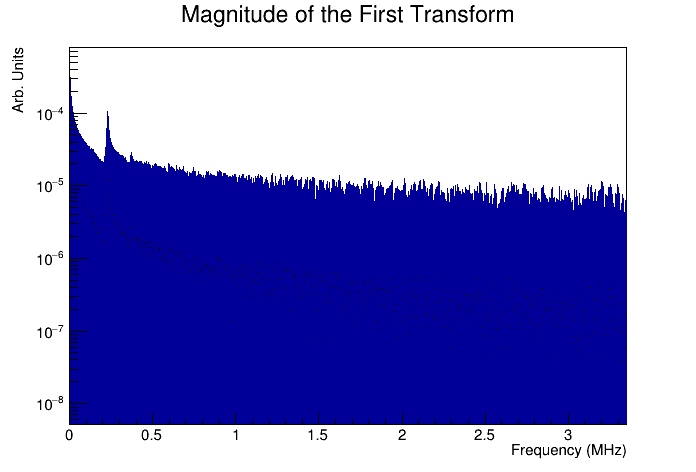

In [11]:
c8 = r.TCanvas()
hxformlist[3].Draw()
c8.SetLogy()
c8.Draw()

Info in <TCanvas::Print>: eps file ./FiveFourier.eps has been created


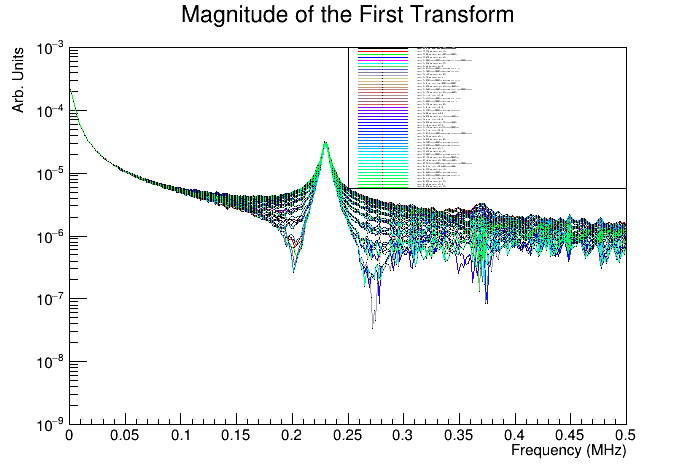

In [12]:
#print(hxformlist)
#print(ratiolist)
c5 = r.TCanvas()
c5.SetLogy()
hxformlist[0].GetYaxis().SetRangeUser(0.000000001,.001)
hxformlist[0].SetLineColor(1)
hxformlist[0].Draw("HIST L P")
#hxformlist[0].GetXaxis().SetRangeUser(0,6)
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.AddEntry(hxformlist[0],timelist[0],"pl")
for i in range(1,len(hxformlist)):
    hxformlist[i].SetLineColor(1+i)
    if i >= 4:
        hxformlist[i].SetLineColor(2+i)
    if i>= 8:
        hxformlist[i].SetLineColor(31+i)
    hxformlist[i].Draw("HIST L P SAME")
    leg.AddEntry(hxformlist[i],timelist[i],"pl")
leg.Draw("SAME")
hxformlist[0].GetXaxis().SetRangeUser(0,.5)
c5.Draw()
c5.Print("./FiveFourier.eps")

In [13]:
binlist = []
xptlist = []
for i in range(0,len(hxformlist)):
    binx = hxformlist[i].GetXaxis().FindBin(.2)
    valueBin = hxformlist[i].GetBinContent(binx)
    binlist.append(valueBin)
    xptlist.append(.55*i)
print(binlist)

import matplotlib.pyplot as plt
plt.plot(xptlist,binlist)
plt.yscale('log')
plt.show()

[1.6822279048775587e-06, 7.727580252188147e-07, 6.659117199674855e-07, 1.6585158368099223e-06, 2.636613948086663e-06, 3.408865702697972e-06, 4.00340607894687e-06, 4.429300266697036e-06, 4.7069435788008155e-06, 4.831990491617117e-06, 4.81260128129813e-06, 4.650101578530779e-06, 4.331056428922207e-06, 3.866391227628791e-06, 3.2156202478200313e-06, 2.3674208281818967e-06, 1.3705191798169013e-06, 4.167650649122844e-07, 8.826392642051631e-07, 1.8404002283903426e-06, 2.7518058180898653e-06, 3.5810749694134165e-06, 4.201092132999808e-06, 4.636160096885662e-06, 4.8972664541665845e-06, 5.009748445316054e-06, 4.97954090101226e-06, 4.80495415240765e-06, 4.461167621977418e-06, 3.929854211967019e-06, 3.222272313437377e-06, 2.351009939656398e-06, 1.3229467812407175e-06, 2.6273284294842127e-07, 9.733918374512138e-07, 2.0586566356759812e-06, 3.0154914849780166e-06, 3.802081533834719e-06, 4.379523745201784e-06, 4.7821007819915915e-06, 5.036489604188832e-06, 5.130065851420049e-06, 5.0789890497320825e-06

<Figure size 640x480 with 1 Axes>

[2.694585545403602e-06, 2.818221703900912e-06, 2.8290551065981837e-06, 2.710759809291726e-06, 2.4832885449229288e-06, 2.1837162228214997e-06, 1.8242212245737021e-06, 1.41157987861394e-06, 9.77753957770856e-07, 5.930127010351025e-07, 5.093535081078496e-07, 8.447786200421505e-07, 1.3360844106284106e-06, 1.833153331063043e-06, 2.2880966553377603e-06, 2.6861351295324384e-06, 2.9684564019221315e-06, 3.088664415534996e-06, 3.0516246332179628e-06, 2.860319702491543e-06, 2.4971153543841927e-06, 2.0156519322467337e-06, 1.5016600607154497e-06, 9.872117279459998e-07, 5.735351729184838e-07, 5.108218842595425e-07, 8.270449375075994e-07, 1.2466718657688317e-06, 1.6799787839246938e-06, 2.0909753992252496e-06, 2.4309839870813106e-06, 2.6812574517028916e-06, 2.8252224987946128e-06, 2.8342715337967303e-06, 2.729041037351544e-06, 2.512537245041124e-06, 2.212542238174491e-06, 1.8669568090410675e-06, 1.5084231205166984e-06, 1.1365311407605874e-06, 8.189938057439756e-07, 6.877346888604052e-07, 8.10595981093

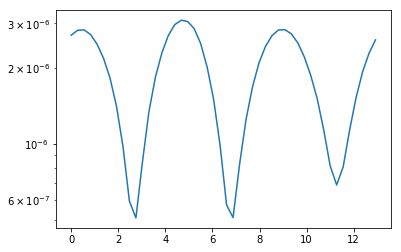

In [14]:
binlist = []
xptlist = []
for i in range(0,len(hxformlist)):
    binx = hxformlist[i].GetXaxis().FindBin(.3)
    valueBin = hxformlist[i].GetBinContent(binx)
    binlist.append(valueBin)
    xptlist.append(.55/2*i)
print(binlist)

import matplotlib.pyplot as plt
plt.plot(xptlist,binlist)
plt.yscale('log')
plt.show()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  4.60707e-08
NDf                       =           44
Edm                       =  9.10333e-08
NCalls                    =           82
p0                        =  3.44325e-05   +/-   6.86286e-06 
p1                        = -3.91882e-06   +/-   1.24065e-05 
p2                        =     0.301669   +/-   4.57616e-05 
p3                        =    -0.214758   +/-   4.57615e-05 


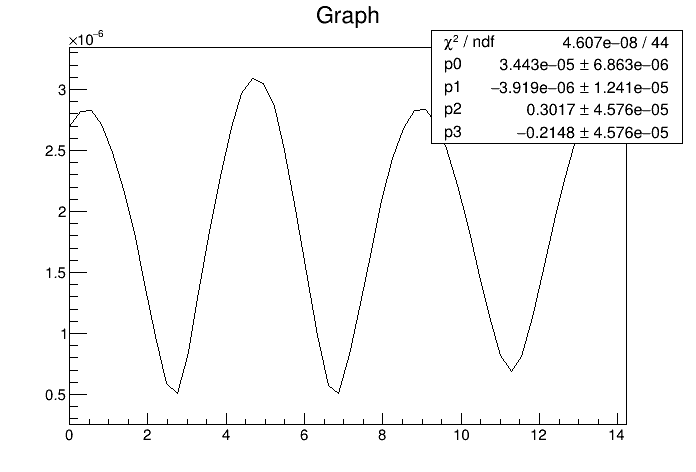

In [15]:
residgraph = r.TGraph(len(binlist))
for i in range(0,len(binlist)):
    residgraph.SetPoint(i,xptlist[i],binlist[i])
c = r.TCanvas()
residgraph.Draw("apl")
fitxform = r.TF1("fitxform","[0]+[1]*sin([2]*x+[3])*sin([2]*x+[3])",0,12)
#fitxform = r.TF1("fitxform","[0]+[1]*sin([2]*x+[3])",0,12)
fitxform.SetParameter(0,0.01)
fitxform.SetParameter(1,.01)
fitxform.SetParameter(2,.4)
fitxform.SetParameter(3,0)
residgraph.Fit("fitxform")
c.Draw()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  4.18727e-08
NDf                       =           44
Edm                       =  8.24038e-08
NCalls                    =           82
p0                        =  -1.9264e-05   +/-   4.43032e-06 
p1                        =  -2.9027e-05   +/-   6.14618e-06 
p2                        =      1.72164   +/-   4.36268e-05 
p3                        =     -1.85619   +/-   4.36268e-05 


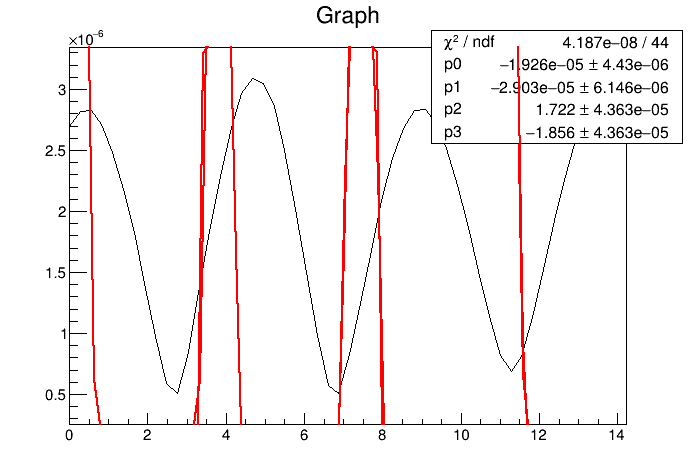

In [16]:
residgraph = r.TGraph(len(binlist))
for i in range(0,len(binlist)):
    residgraph.SetPoint(i,xptlist[i],binlist[i])
c = r.TCanvas()
residgraph.Draw("apl")
fitxform = r.TF1("fitxform","[0]+[1]*sin([2]*x+[3])",0,12)
fitxform.SetParameter(0,0.008)
fitxform.SetParameter(1,.005)
fitxform.SetParameter(2,1.5)
fitxform.SetParameter(3,.5)
residgraph.Fit("fitxform")
fitxform.Draw("SAME")
c.Draw()

2630 392.3880597014925 20.074626865671643 412.46268656716416
0.14919698087509223 0.0025484975275770257
13.405096995055155 6.702548497527575
2631 392.53731343283573 20.223880597014926 412.7611940298507
0.1491970024450155 0.002547528517110267
13.405095057034224 6.70254752851711
2631 392.5373134328358 20.52238805970149 413.0597014925373
0.1491970024450155 0.0025475285171102664
13.405095057034222 6.70254752851711
2631 392.5373134328358 20.82089552238806 413.35820895522386
0.1491970024450155 0.0025475285171102664
13.405095057034222 6.70254752851711
2631 392.5373134328358 21.119402985074625 413.6567164179104
0.1491970024450155 0.0025475285171102664
13.405095057034222 6.70254752851711
2631 392.5373134328358 21.417910447761194 413.955223880597
0.1491970024450155 0.0025475285171102664
13.405095057034222 6.70254752851711
2630 392.38805970149247 21.71641791044776 414.10447761194024
0.1491969808750922 0.0025484975275770257
13.405096995055155 6.702548497527577
2631 392.5373134328358 21.865671641791

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hresid (P

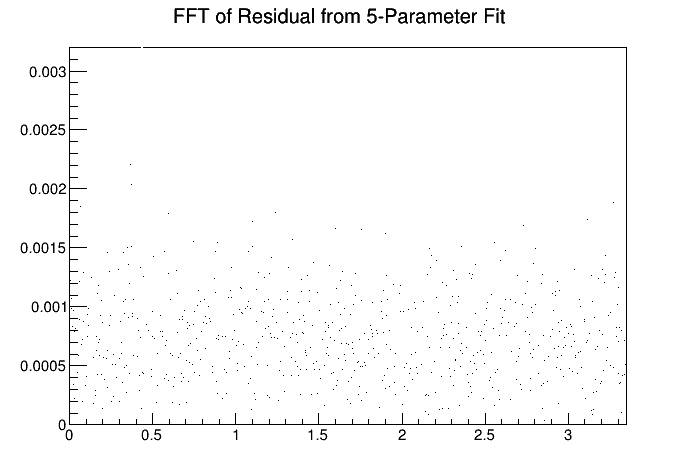

In [17]:
residxformlist = []
for j in range(0,len(namelist)):
    c3 = r.TCanvas()
    #tgraph3.Draw()
    tgraph3 = ratiolist[j]
    c3.Draw()
    residualN = tgraph3.GetN() - 2
    listx = []
    listy = []
    for i in range(0,residualN):
        xi = r.Double(9999)
        yi = r.Double(9999)
        tgraph3.GetPoint(i,xi,yi)
        listx.append(xi)
        listy.append(yi)
    #print(listy)
    import numpy
    ffty = numpy.abs(numpy.fft.fft(listy))
    #print(ffty)

    Npart = residualN
    minBinCenter = listx[0]
    maxBinCenter = listx[len(listx)-1]
    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)

    hresid = r.TH1D("hresid","FFT of Residual from 5-Parameter Fit",residualN,0,residualN)
    for i in range(0,residualN):
        hresid.SetBinContent(i,ffty[i])
    hresid.SetBins(residualN,0,limmaxMHz)
    hresid.GetXaxis().SetRangeUser(0,limmaxMHz/2.0)
    
    hresid.Scale(1/(hresid.Integral()))
    
    hresid.Draw("P0 L")
    
    c3.Draw()
    
    residxformlist.append(hresid.DrawClone(namelist[j]+"residxform"))

[<ROOT.TH1D object ("hresid") at 0x7feacd194eb0>, <ROOT.TH1D object ("hresid") at 0x7feacd2cd5c0>, <ROOT.TH1D object ("hresid") at 0x7feacd063a70>, <ROOT.TH1D object ("hresid") at 0x7feacd2ccd00>, <ROOT.TH1D object ("hresid") at 0x7feacd2ff6f0>, <ROOT.TH1D object ("hresid") at 0x7feacd062c20>, <ROOT.TH1D object ("hresid") at 0x7feacd062370>, <ROOT.TH1D object ("hresid") at 0x7feacd073e00>, <ROOT.TH1D object ("hresid") at 0x7feacd301cb0>, <ROOT.TH1D object ("hresid") at 0x7feacd3812a0>, <ROOT.TH1D object ("hresid") at 0x7feacd2ce7f0>, <ROOT.TH1D object ("hresid") at 0x7feacd2ce400>, <ROOT.TH1D object ("hresid") at 0x7feacd305490>, <ROOT.TH1D object ("hresid") at 0x7feacd3050a0>, <ROOT.TH1D object ("hresid") at 0x7feacd38b520>, <ROOT.TH1D object ("hresid") at 0x7feacd38b130>, <ROOT.TH1D object ("hresid") at 0x7feacd2cbbe0>, <ROOT.TH1D object ("hresid") at 0x7feacd2cb7f0>, <ROOT.TH1D object ("hresid") at 0x7feacd344ba0>, <ROOT.TH1D object ("hresid") at 0x7feacd194100>, <ROOT.TH1D object (

Info in <TCanvas::Print>: eps file ./FiveFourier_Resid.eps has been created


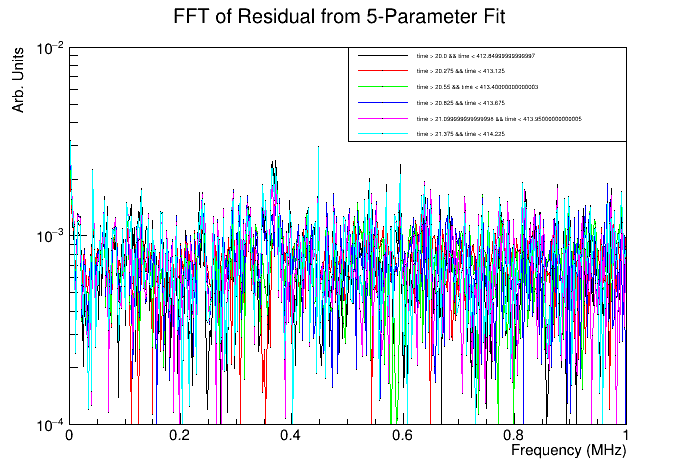

In [18]:
print(residxformlist)
c6 = r.TCanvas()
c6.SetLogy()
residxformlist[0].SetLineColor(1)
residxformlist[0].GetXaxis().SetTitle("Frequency (MHz)")
residxformlist[0].GetYaxis().SetTitle("Arb. Units")
residxformlist[0].GetYaxis().SetRangeUser(.0001,.01)
residxformlist[0].Draw("HIST L P")
residxformlist[0].GetXaxis().SetRangeUser(0,1)
leg = r.TLegend(0.5,0.7,0.9,0.9)
leg.AddEntry(residxformlist[0],timelist[0],"pl")
for i in range(1,6):
    residxformlist[i].SetLineColor(1+i)
    if i >= 4:
        residxformlist[i].SetLineColor(2+i)
    residxformlist[i].Draw("HIST L P SAME")
    leg.AddEntry(residxformlist[i],timelist[i],"pl")
leg.Draw("SAME")
residxformlist[0].GetXaxis().SetRangeUser(0,1)
c6.Draw()
c6.Print("./FiveFourier_Resid.eps")

[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7
[0.         0.00042653 0.00085306 ... 0.00085306 0.00042653 0.        ]
4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134

Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Rep

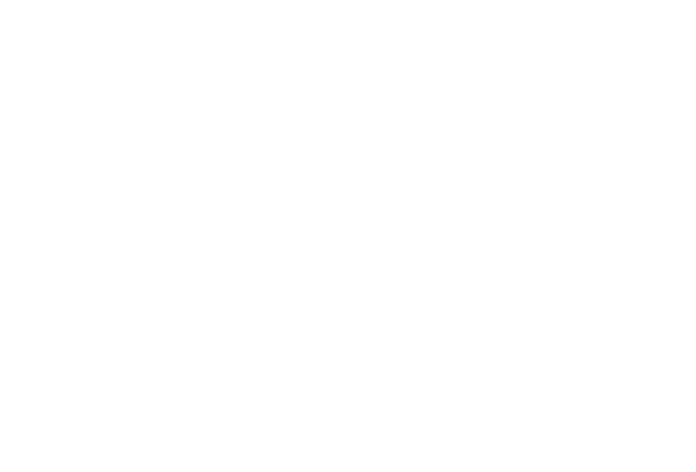

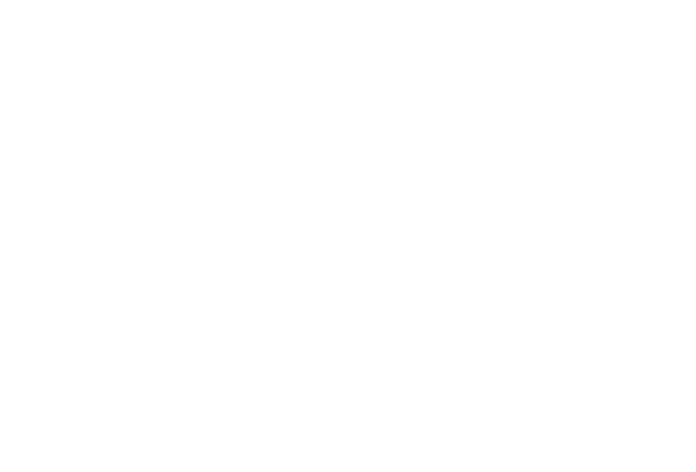

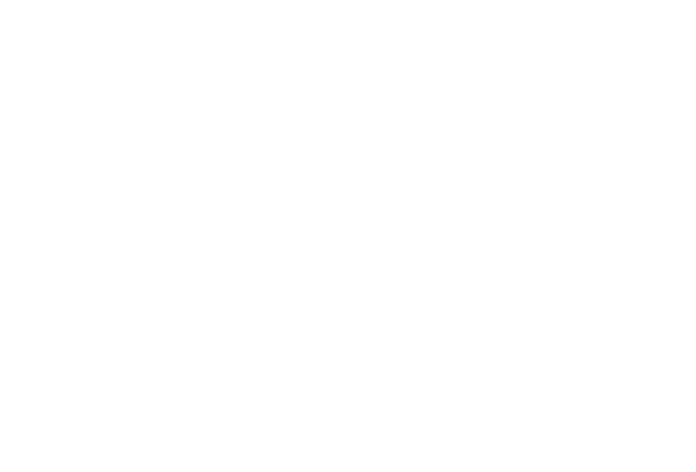

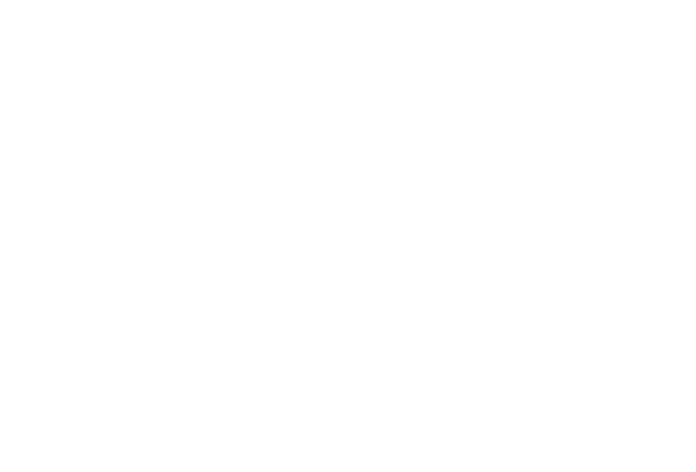

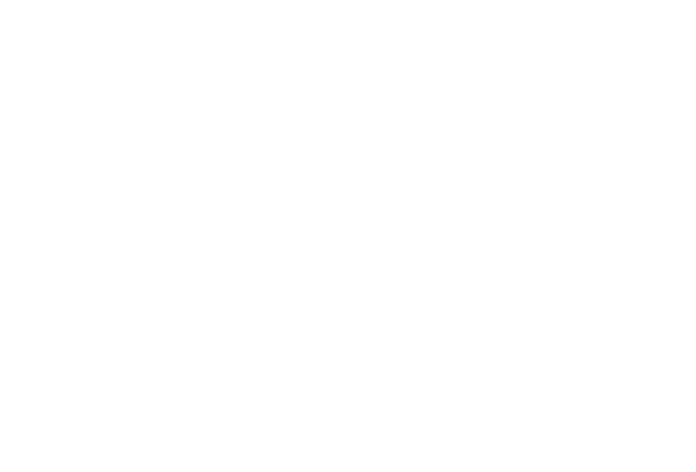

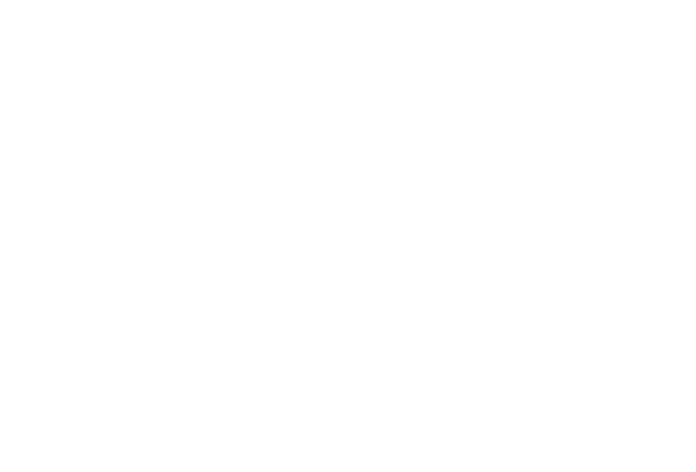

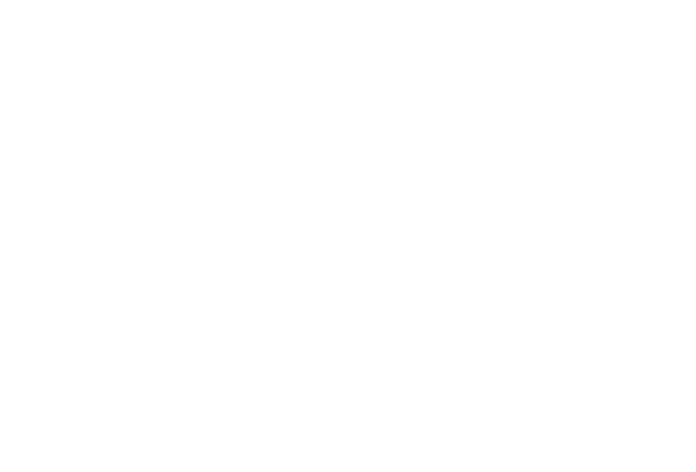

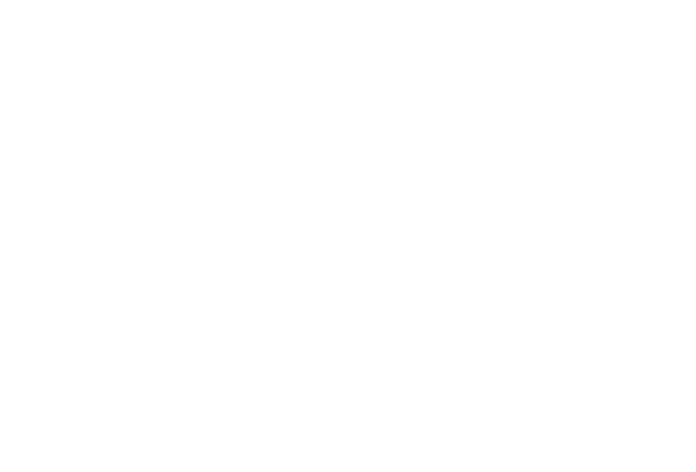

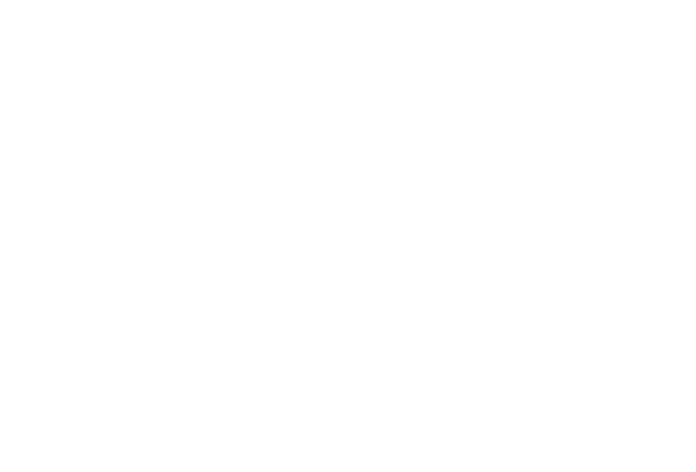

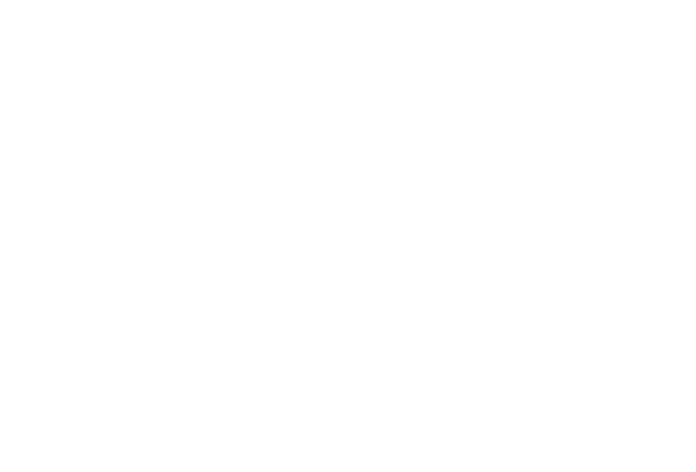

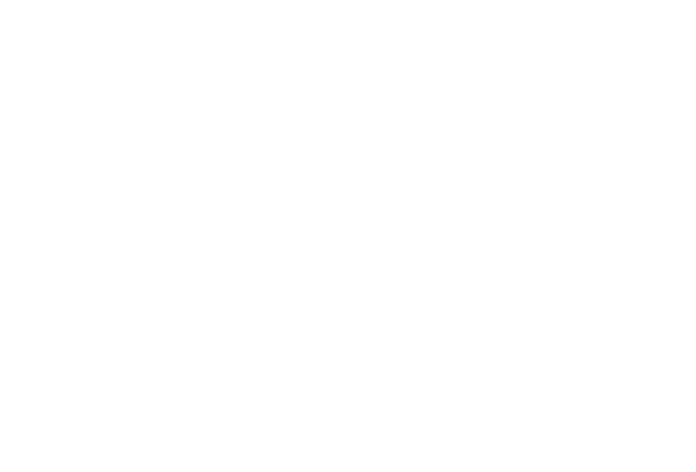

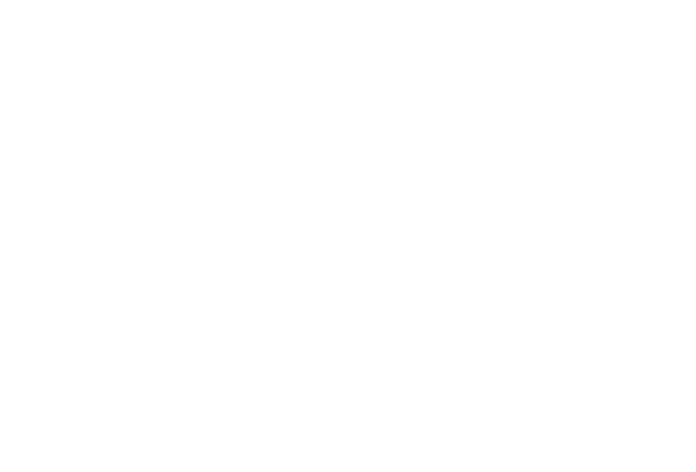

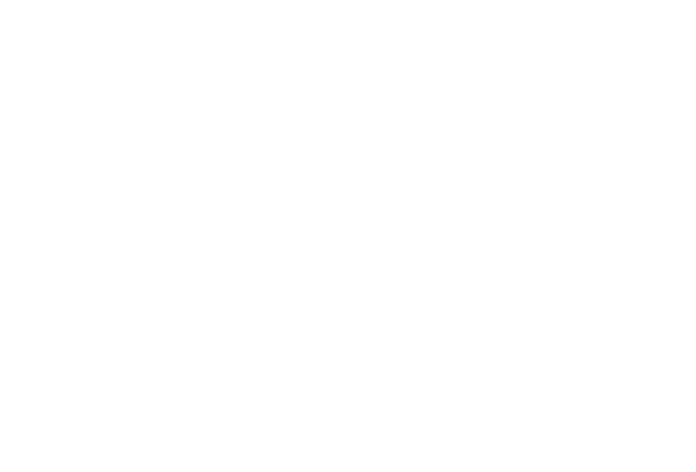

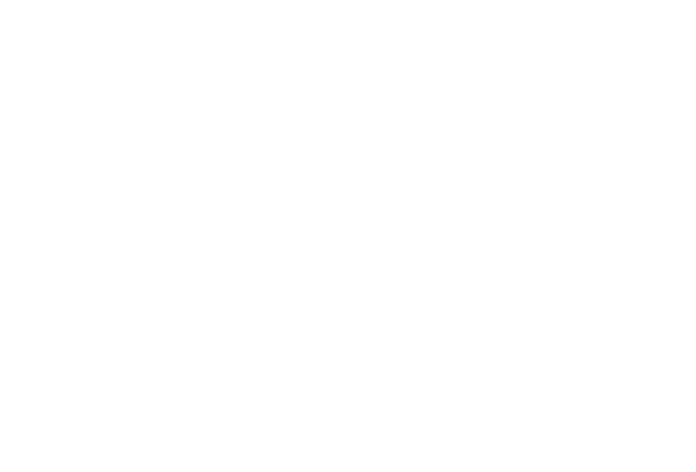

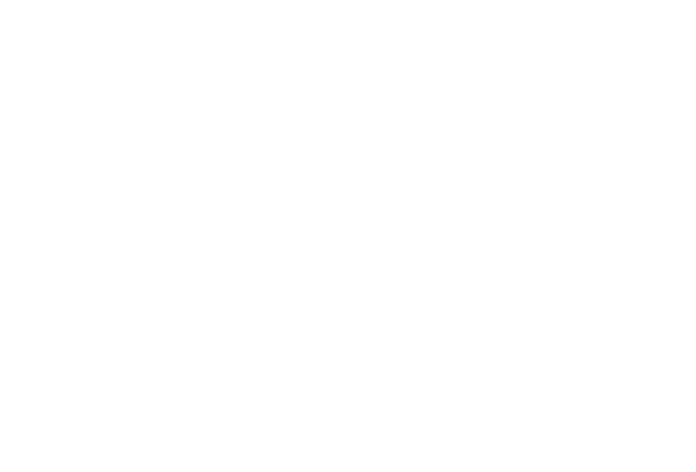

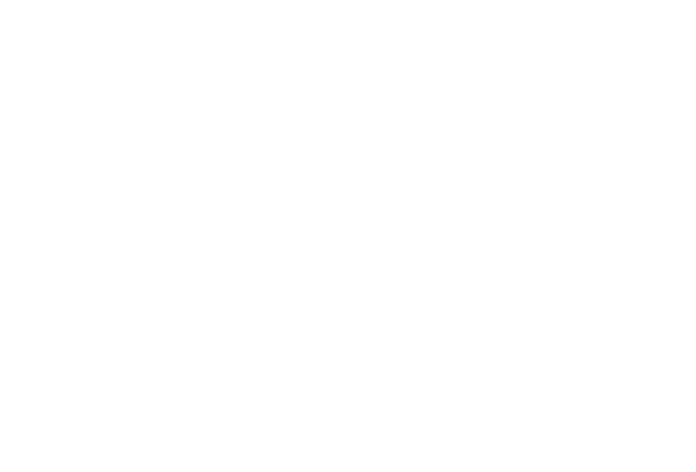

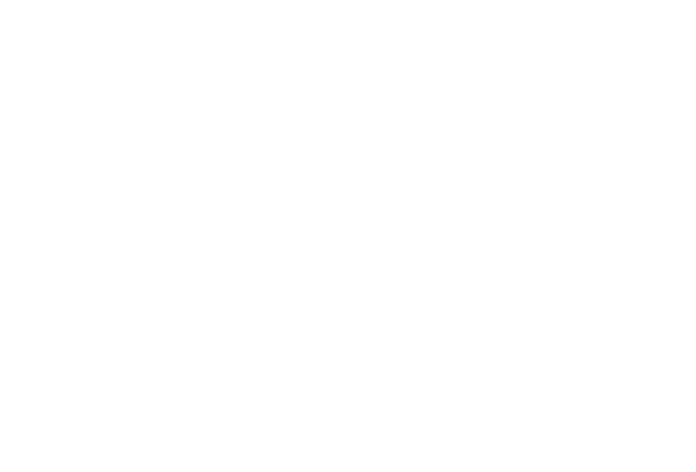

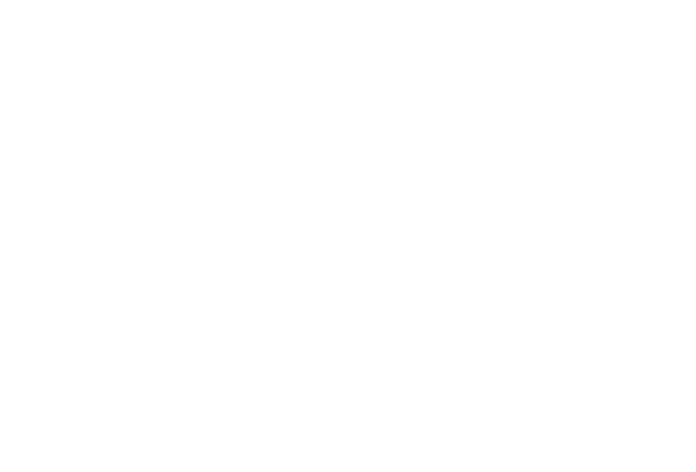

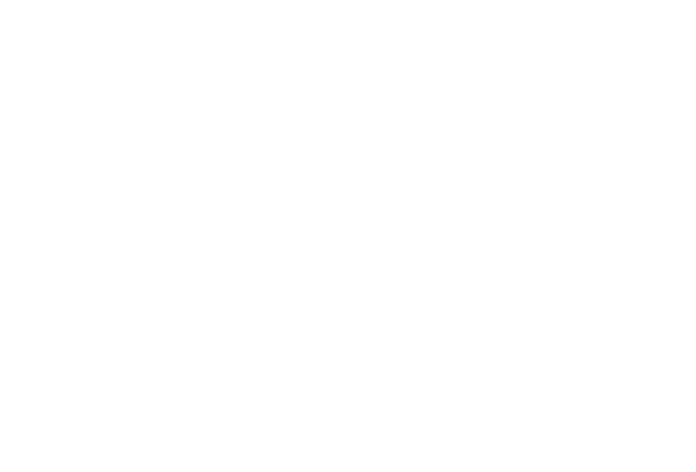

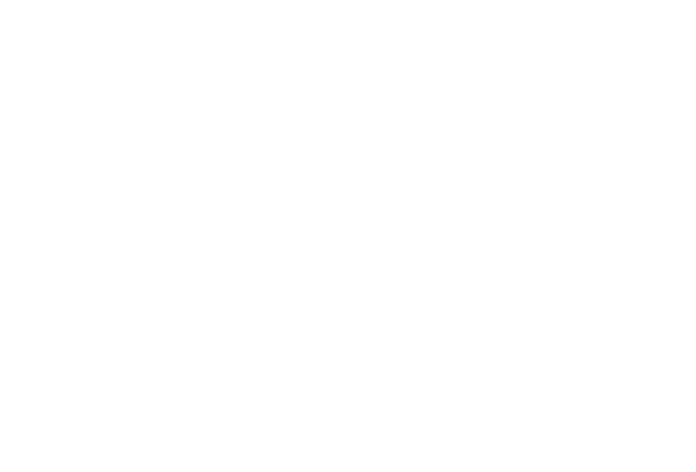

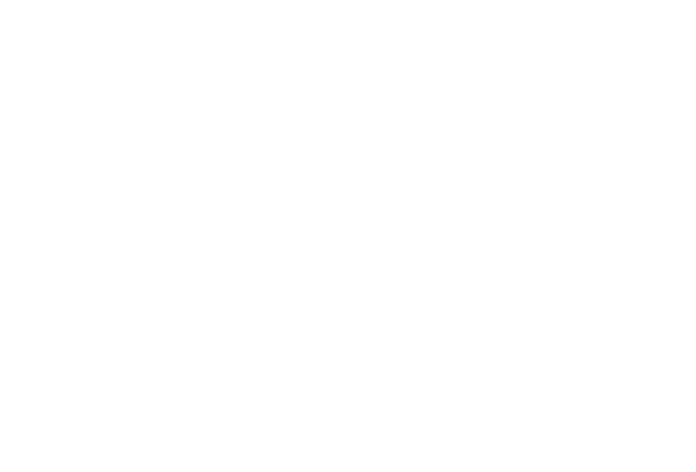

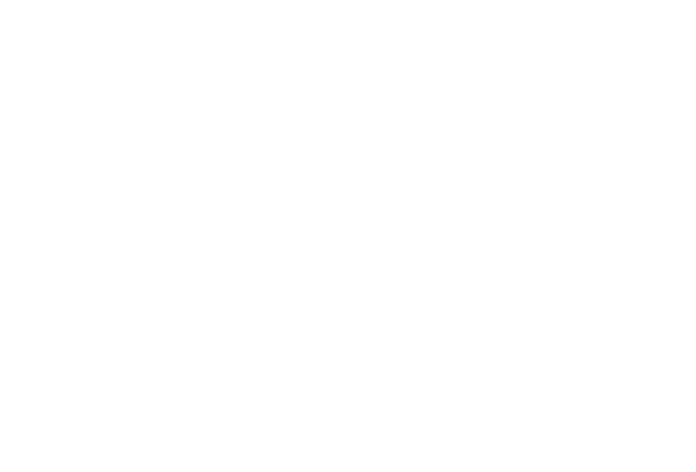

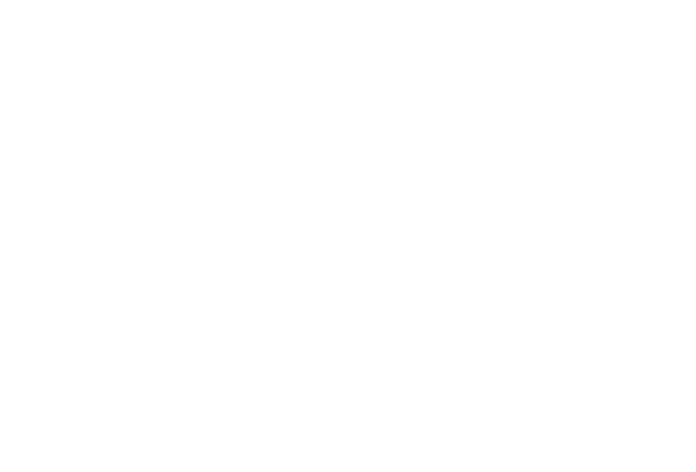

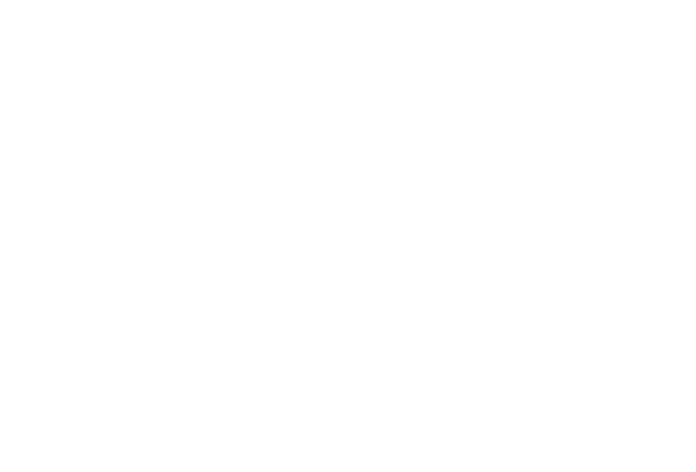

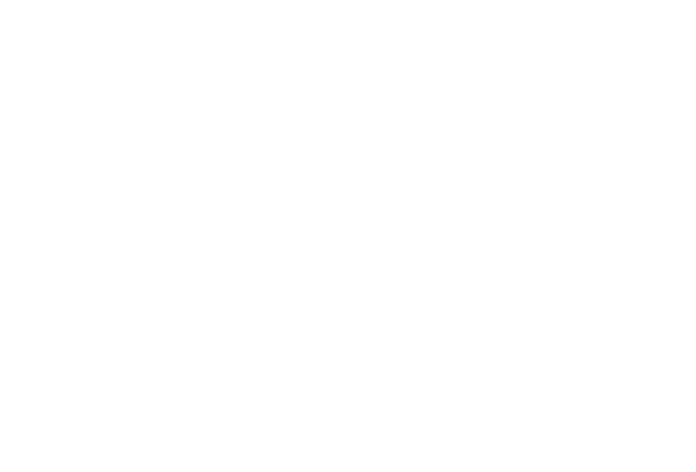

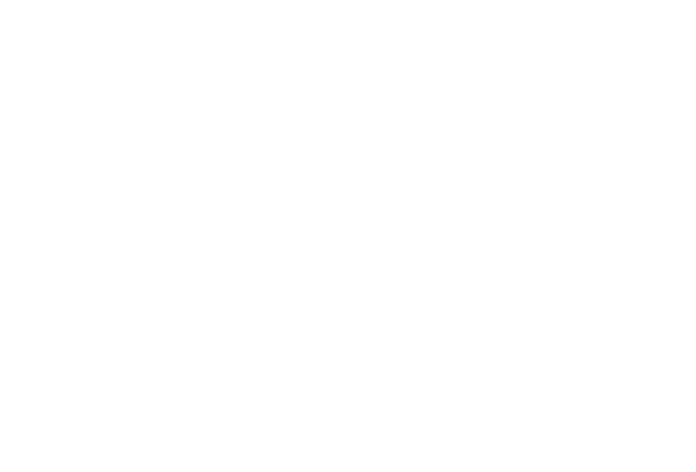

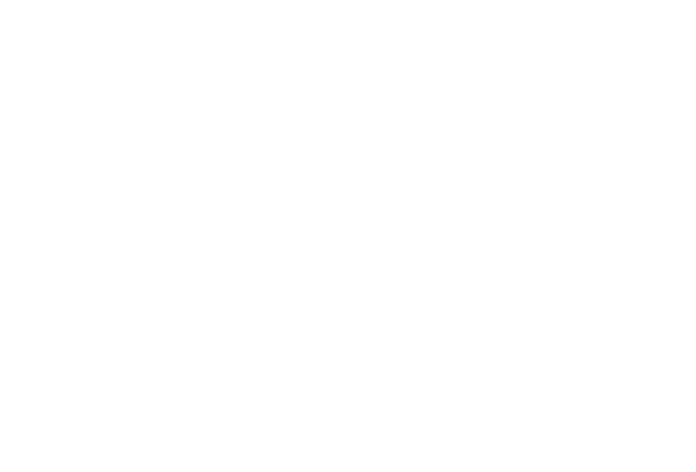

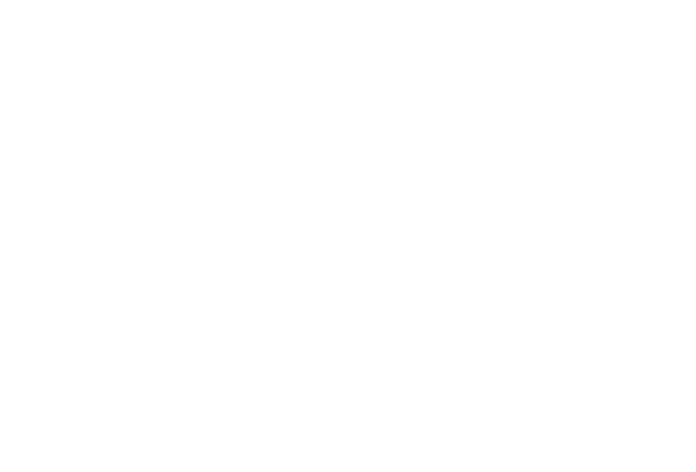

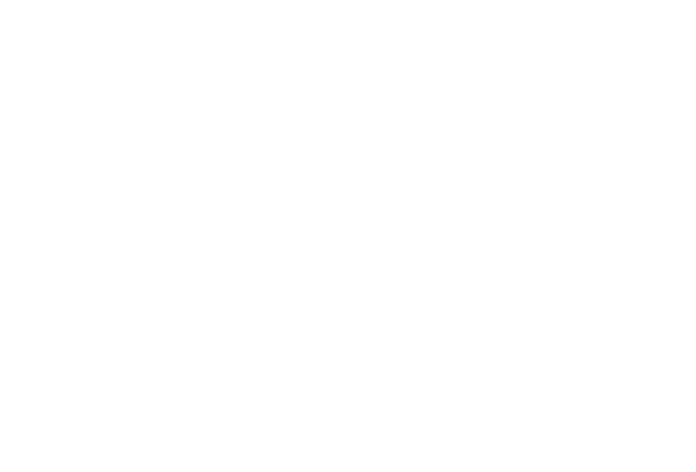

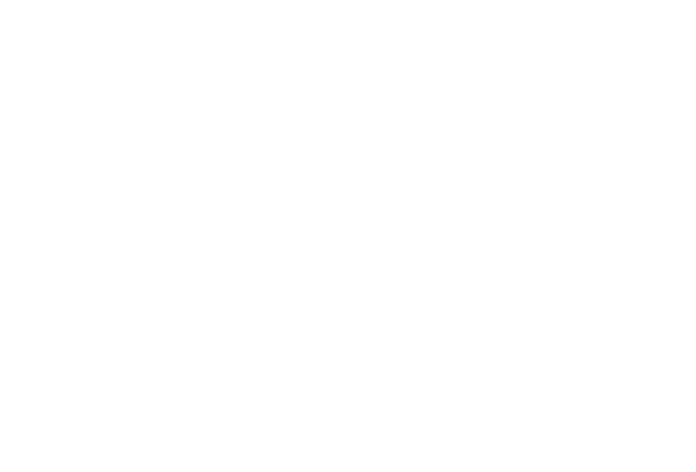

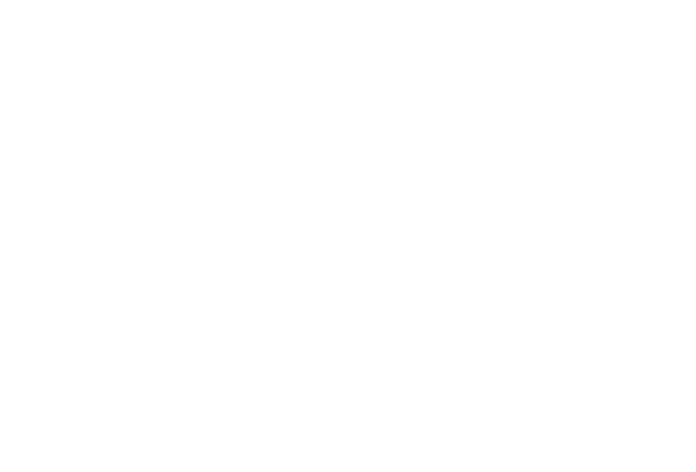

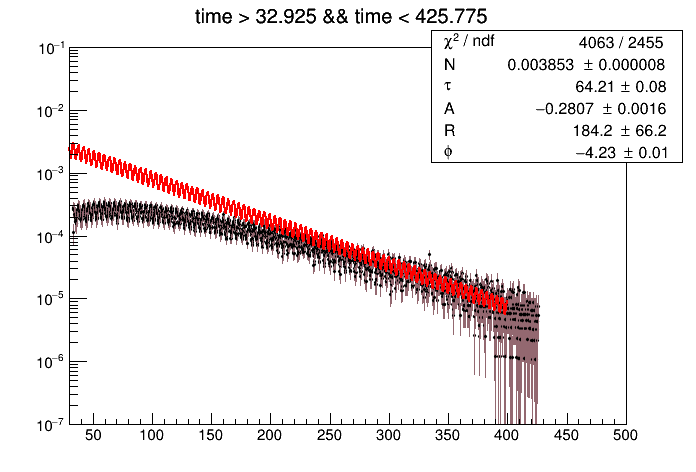

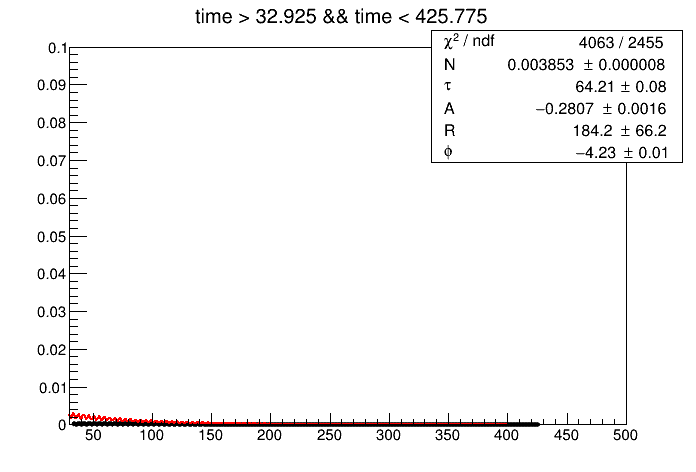

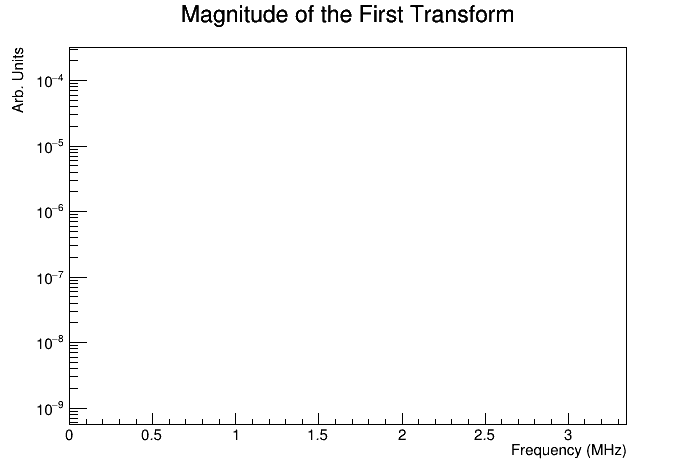

In [19]:
import numpy as np
hxformlistwindow = []
for i in range(0,len(namelist)):
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    h = hlist[i].DrawClone("ding")
    Npart = h.GetSize() - 2
    
    window = np.bartlett(Npart)
    print(window)
    for j in range(0,Npart):
        bincontent = h.GetBinContent(j)
        newcontent = bincontent*window[j]
        h.SetBinContent(j,newcontent)
        
    c = r.TCanvas()
    h.Draw()
    c.Draw()
    
    hxform = h.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform")
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    #hxform.GetXaxis().SetRangeUser(0,limmax)
    c2 = r.TCanvas()
    c2.cd()
    c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("P0 L")
    c2.Draw()
    
    minBinCenter = h.GetXaxis().GetBinCenter(0)
    maxBinCenter = h.GetXaxis().GetBinCenter(Npart)
#    minBinCenter = 0
#    maxBinCenter = 392.85
    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = h.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

    hxformlistwindow.append(hxform.DrawClone(namelist[i]+"xformwindow"))

In [20]:
print(hxformlistwindow)

[<ROOT.TH1D object ("out_MAG P") at 0x7feacce88a40>, <ROOT.TH1D object ("out_MAG P") at 0x7feacce87280>, <ROOT.TH1D object ("out_MAG P") at 0x7feacd13d750>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccf29bb0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccb89060>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccba80b0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccb87050>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccb878a0>, <ROOT.TH1D object ("out_MAG P") at 0x7feacccbd5b0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccd804f0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccc1f440>, <ROOT.TH1D object ("out_MAG P") at 0x7feacce8d170>, <ROOT.TH1D object ("out_MAG P") at 0x7feacce8b3b0>, <ROOT.TH1D object ("out_MAG P") at 0x7feacce89ad0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccb867d0>, <ROOT.TH1D object ("out_MAG P") at 0x7feacc9decd0>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccba8830>, <ROOT.TH1D object ("out_MAG P") at 0x7feaccb85ef0>, <ROOT.TH1D object ("out_MAG P") at 0x7feacce8b7a0>, <ROOT.TH1D 

Info in <TCanvas::Print>: eps file ./FiveFourier.eps has been created


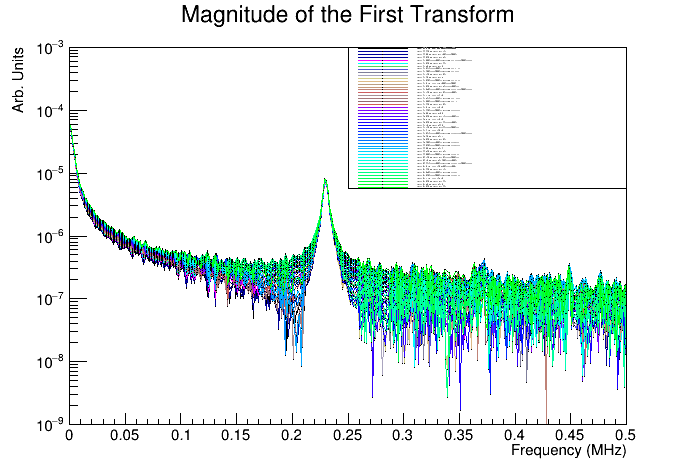

In [21]:
c5 = r.TCanvas()
c5.SetLogy()
hxformlistwindow[0].GetYaxis().SetRangeUser(0.000000001,.001)
hxformlistwindow[0].SetLineColor(1)
hxformlistwindow[0].Draw("HIST L P")
#hxformlist[0].GetXaxis().SetRangeUser(0,6)
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.AddEntry(hxformlistwindow[0],timelist[0],"pl")
for i in range(1,len(hxformlistwindow)):
    hxformlist[i].SetLineColor(1+i)
    if i >= 4:
        hxformlistwindow[i].SetLineColor(2+i)
    if i>= 8:
        hxformlistwindow[i].SetLineColor(31+i)
    hxformlistwindow[i].Draw("HIST L P SAME")
    leg.AddEntry(hxformlistwindow[i],timelist[i],"pl")
leg.Draw("SAME")
hxformlistwindow[0].GetXaxis().SetRangeUser(0,.5)
c5.Draw()
c5.Print("./FiveFourier.eps")

[2.694585545403602e-06, 2.818221703900912e-06, 2.8290551065981837e-06, 2.710759809291726e-06, 2.4832885449229288e-06, 2.1837162228214997e-06, 1.8242212245737021e-06, 1.41157987861394e-06, 9.77753957770856e-07, 5.930127010351025e-07, 5.093535081078496e-07, 8.447786200421505e-07, 1.3360844106284106e-06, 1.833153331063043e-06, 2.2880966553377603e-06, 2.6861351295324384e-06, 2.9684564019221315e-06, 3.088664415534996e-06, 3.0516246332179628e-06, 2.860319702491543e-06, 2.4971153543841927e-06, 2.0156519322467337e-06, 1.5016600607154497e-06, 9.872117279459998e-07, 5.735351729184838e-07, 5.108218842595425e-07, 8.270449375075994e-07, 1.2466718657688317e-06, 1.6799787839246938e-06, 2.0909753992252496e-06, 2.4309839870813106e-06, 2.6812574517028916e-06, 2.8252224987946128e-06, 2.8342715337967303e-06, 2.729041037351544e-06, 2.512537245041124e-06, 2.212542238174491e-06, 1.8669568090410675e-06, 1.5084231205166984e-06, 1.1365311407605874e-06, 8.189938057439756e-07, 6.877346888604052e-07, 8.10595981093

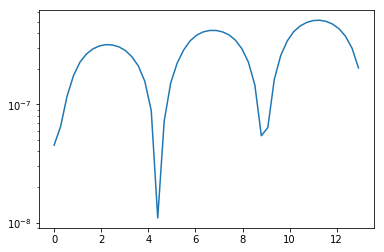

In [22]:
binlistwindow = []
xptlistwindow = []
for i in range(0,len(hxformlistwindow)):
    binx = hxformlistwindow[i].GetXaxis().FindBin(.2)
    valueBin = hxformlistwindow[i].GetBinContent(binx)
    binlistwindow.append(valueBin)
    xptlistwindow.append(.55/2*i)
print(binlist)

import matplotlib.pyplot as plt
plt.plot(xptlistwindow,binlistwindow)
plt.yscale('log')
plt.show()

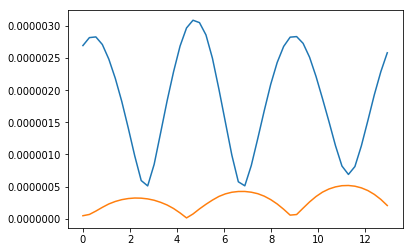

In [23]:
plt.plot(xptlist,binlist)
plt.plot(xptlistwindow,binlistwindow)
#plt.yscale('log')
plt.show()

In [24]:
outfile = r.TFile("./FourierWiggle_output_Window.root","RECREATE")
for i in range(0,len(hxformlistwindow)):
    string = namelist[i] + "_window"
    hxformlistwindow[i].Write(string)
outfile.Close()

In [25]:
outfile2 = r.TFile("./FourierWiggle_output_noWindow.root","RECREATE")
for i in range(0,len(hxformlistwindow)):
    string = namelist[i] + "_noWindow"
    hxformlist[i].Write(string)
outfile2.Close()

In [26]:
outfile3 = r.TFile("./FourierWiggle_output_noWindow_Residuals.root","RECREATE")
for i in range(0,len(residxformlist)):
    string = namelist[i] + "_noWindow_residual"
    residxformlist[i].Write(string)
outfile3.Close()